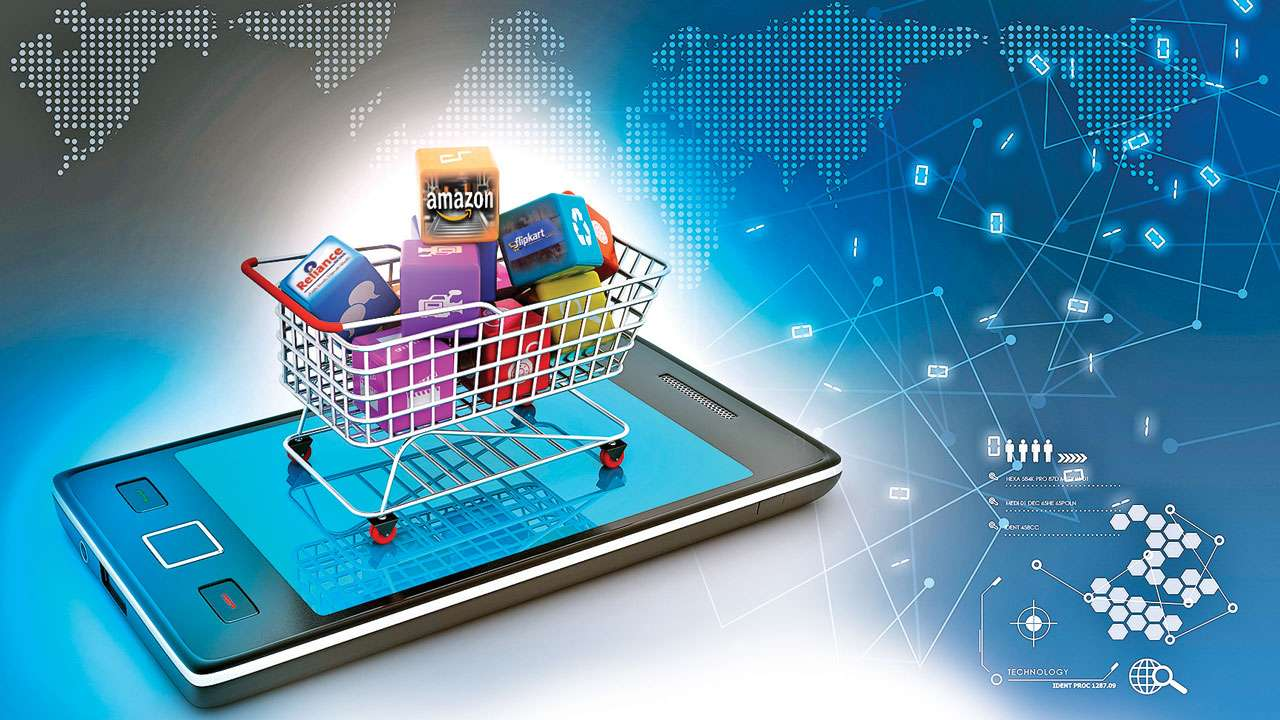




# Project Description

## The Challenge

You are part of a Data Scientists team from the All In One Place company, that needs to determine who are the clients eligible to participate of the “Insiders Program”. With this clients list on hand, the marketing team will a sequency of a custom and exclusive actions for this group, in order to rise the revenues and the purchase frequency. 
As result for this project is expected that you deliver a list with eligible clients to participate of the “Insiders Program”, as well a report answering the following questions:

1. Who are the elegible people to participate in the “Insiders Program”?
2. How many clients will be part of the group?
3. Which are the main caracteristics for the group?
4. Which is the revenues percentage that comes from the group?
5. Which are the expected revenues from this group for the next months?
6. Which are the conditions to a client be eligible for the “Insiders”?
7. Which are the conditions to a client be removed from the “Insiders”?
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
9. Which actions the marketing team can perform in order to improve the income?

## The Data

The data set is available on the Kaggle platform, through this link:

https://www.kaggle.com/vik2012kvs/high-value-customers-identification

Each row represents a sell transaction that happened between November 2016 and December 2017. The dataset includes the following informations:

• **Invoice Number:** unique id from each purchase.

• **Stock Code Product:** item code.

• **Description Product:** item name.

• **Quantity:** the quantity of each item purchased per transaction.

• **Invoice Date:** the day that the purchase occurred.

• **Unit Price:** product price per unit.

• **Customer ID:** client id.

• **Country:** the client country.

## Soluction Planning

### IOT Planning

#### Input



1. Businnes Problem
    - Select the high value customers.
    
2. Dataset.
    - Sales in a 1 year period.

#### Output



1. Customers identification for Insiders Program.
    - Insiders Programs Customers list.
    
2. Report.
    - Businnes questions answers. 
    
        1. Who are the elegible people to participate in the “Insiders Program”?
        2. How many clients will be part of the group?
        3. Which are the main caracteristics for the group?
        4. Which is the revenues percentage that comes from the group?
        5. Which are the expected revenues from this group for the next months?
        6. Which are the conditions to a client be eligible for the “Insiders”?
        7. Which are the conditions to a client be removed from the “Insiders”?
        8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
        9. Which actions the marketing team can perform in order to improve the income?

#### Tasks

1. Who are the elegible people to participate in the “Insiders Program”?
    - What is a "elegible customer" for the businnes?
        - Revenues
            - High AVG Ticket (AVG purchase value)
            - High LTV (Total purchase values)
            - Low recence (how oft the customer make a purchase)
            - High basket size.
            - Low churning probability.
            - High LTV prediction.
            - High propensity to buy.
            
        - Cost
            - Low return rate.
                        
        - Shopping experience
            - High AVG evaluation.
            
            
            
2. How many clients will be part of the group?
    - There is a limit of customer for the Insiders Program?
    - GRoup percentage.
    
    
3. Which are the main caracteristics for the group?
    - Age.
    - Location.
    - See question 1
    
4. Which is the revenues percentage that comes from the group?
    - Total year revenues.
    - Total Insiders group revenues.
    - Comparation.
    
5. Which are the expected revenues from this group for the next months?
    - Insiders group LVT.
    - Cohort analysis - time customer marker.

6. Which are the conditions to a client be eligible for the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be similar
    
7. Which are the conditions to a client be removed from the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be dissimilar from insiders.
    
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
    - A/B test
    - A/B Beysian test 
    - Hipotesys tests.
9. Which actions the marketing team can perform in order to improve the income?
    - Discount.
    - Buy preference.
    - Free deliver.

#### Benchmark Solutions

1. Desk Research

    1. RFM Model
        - Recency
            - Time since the last purchase.
            - Responsivity.
           
        - Frequency
            - Avg time between transactions.
            - Engagement
            
        - Monetary
            - Total spend, revenues.
            - High value purchases.
            
Step 1
    - Order the groups by a feature.
    
Step 2
    - Divided the customers according to notes.
        - Notes between 1 - 5.
        - 5 groups
        
Step 3
    - Same as step  with other feature.
    
Step 4
    - Do the same with the last feature.
    
Step 5
    - Do the mean between the features scores.
    
    2. RFM Model segmentation
        Categorize customers by the RFM model.

# Imports, Configurations and Helper Functions

## Imports

In [1]:
import dash
import plotly
import random
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import umap.umap_ as umap
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from pandasql import sqldf
from IPython.display import HTML
from sklearn.manifold import TSNE
from pandas_profiling import ProfileReport
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples

## Configurations

In [2]:
warnings.filterwarnings('ignore')

SEED = 43

%matplotlib inline
%pylab inline

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 18

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

sns.set()

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 300
pd.options.display.max_columns = 50

Populating the interactive namespace from numpy and matplotlib


## Helper Functions

In [3]:
# Function to plot graphs titles and labels 
def info_plot(title, xlabel, ylabel):
    plt.title(title, fontsize = 18)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

# Function to plot values upside the barplot
def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 14)
    return None

# Function that plots the silhouette score graphs.
def silhouette_plot(df, model):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (len(np.unique(model.labels_)) + 1) * 10])

    silhouette_avg = silhouette_score(df, model.fit_predict(df))
    print(f"For n_clusters = {len(np.unique(model.labels_))}.\n\nThe average silhouette_score is : {silhouette_avg}.")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, model.fit_predict(df))

    y_lower = 10
    for i in range(len(np.unique(model.labels_))):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / len(np.unique(model.labels_)))
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(model.fit_predict(df).astype(float) / len(np.unique(model.labels_)))
    ax2.scatter(df.values[:, 0], df.values[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((f"Silhouette analysis for Mean Shift clustering. (n_clusters = {len(np.unique(model.labels_))})"),fontsize=14, fontweight='bold')

    plt.show()

# Load Data

In [4]:
# Load data
data_path = r'C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\data\raw\Ecommerce.csv'

df_init = pd.read_csv(data_path)
df_init.head()

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16       2.55    17850.00  United Kingdom         NaN
1    536365     71053                  WHITE METAL LANTERN         6   29-Nov-16       3.39    17850.00  United Kingdom         NaN
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16       2.75    17850.00  United Kingdom         NaN
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16       3.39    17850.00  United Kingdom         NaN
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16       3.39    17850.00  United Kingdom         NaN

# Data Fist Look

In [5]:
print(f'\nROWS: {df_init.shape[0]}\n\nCOLUMNS: {df_init.shape[1]}.\n')


ROWS: 541909

COLUMNS: 9.



In [6]:
# NaN check

df_init.isna().sum()

# Drop NaN
# df_init.dropna(subset = ['Description', 'CustomerID'])

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

In [7]:
# Data Types 

df_init.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Unnamed: 8     float64
dtype: object

In [8]:
# Descriptive statistics

df_init.describe().T

count     mean     std       min      25%      50%      75%      max
Quantity   541909.00     9.55  218.08 -80995.00     1.00     3.00    10.00 80995.00
UnitPrice  541909.00     4.61   96.76 -11062.06     1.25     2.08     4.13 38970.00
CustomerID 406829.00 15287.69 1713.60  12346.00 13953.00 15152.00 16791.00 18287.00
Unnamed: 8      0.00      NaN     NaN       NaN      NaN      NaN      NaN      NaN

In [9]:
# Pandas Proffiling

report1 = ProfileReport(df_init, 'Insiders Program Dataset Report.')
report1

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## First Look Summary.

<span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span>
    
<span style="color:blue">2. The columns are in a weird order - reorder the columns..<span>
    
<span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span>
    
<span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span>
    
<span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span>   
    
<span style="color:blue">6. Check for discrepant information and outliers<span>
    
<span style="color:blue">7. Remove some other weird things that impacts the future datasets<span>
    
<span style="color:blue">8. 2nd cycle - Exclude negative quantityes values from dataset <span>

# Data Cleaning

In [10]:
df_init_2 = df_init.copy()

### <span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span> - DONE

In [11]:
df_init_2.drop(columns = 'Unnamed: 8', inplace = True)

### <span style="color:blue">2. The columns are in a weird order - reorder the columns.<span> - DONE

In [12]:
df_init_2 = df_init_2[['CustomerID', 'Country', 'InvoiceDate','InvoiceNo', 'Description', 'UnitPrice', 'StockCode', 'Quantity']]

### <span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span> - DONE

In [13]:
df_init_2['InvoiceDate'] = pd.to_datetime(df_init_2['InvoiceDate'])

In [14]:
df_init_2.dtypes

CustomerID            float64
Country                object
InvoiceDate    datetime64[ns]
InvoiceNo              object
Description            object
UnitPrice             float64
StockCode              object
Quantity                int64
dtype: object

### <span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span> - DONE
    
    - It was found some codes like "C536379" and it cant be directly tranformed into "INT" type.
    - The "C" before the numbers represents a "Discount" description.
    - It was separated the letter in the code from the numbers and creted a separated column for them - maybe they can be important later.
        - Column "some_code": 
    
        X - there was no letter before the number code.
        [C, A] - The letter code before the number.
    

In [15]:
len(df_init_2[df_init_2['Quantity'] < 0])

10624

In [16]:
print(f'There are {len(df_init_2.set_index("Description").loc["Discount"])} rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters')

There are 77 rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters


In [17]:
print(f'There are {len(df_init_2["Description"].unique())} diferent unique products descriptions.')
print(f'There are {len(df_init_2["StockCode"].unique())} diferent unique stock codes.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} diferent unique Invoice Numbers.')

There are 4224 diferent unique products descriptions.
There are 4070 diferent unique stock codes.
There are 25900 diferent unique Invoice Numbers.


In [18]:
normal = []
not_normal = []

for x in df_init_2['InvoiceNo']:
    if len(x) == 6:
        normal.append(x)
    else:
        not_normal.append(x)

In [19]:
print(f'There are {len(not_normal)} "InvoiceNo" with some letter before the numbers')

There are 9291 "InvoiceNo" with some letter before the numbers


In [20]:
# Created the "SOME_CODE" column, to split the "InvoiceNo" from some code before the numbers.

df_init_2['some_code'] = df_init_2['InvoiceNo'].apply(lambda x: "X" if len(x) == 6 else x[0])

In [21]:
# Separated the code (letter) before some "InvouceNo" from the number itself.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].apply(lambda x: x if len(x) == 6 else x[1:])

In [22]:
df_init_2['some_code'].value_counts()

X    532618
C      9288
A         3
Name: some_code, dtype: int64

In [23]:
# Tranformed df_init_2['InvoiceNo'] into INTEGER.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].astype(int)

In [24]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [25]:
print(f'There are {len(df_init_2[df_init_2["Quantity"] < 0])} rows with negative quantity.')

There are 10624 rows with negative quantity.


### <span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span> - DONE
    
    - There are 135080 NaNs at the CustomerID column, almost 25% of all the dataset.
    
    OPTIONS:
    - input an ID for these customers based on the invoice number - each invoice number belongs to a customer.
    
    FINAL DECISION:
    - After some analysis, it was understood that the NaN values at the columns CustomerID and Description are not relevant for the future clustering model training. 
      It was decided to mantein the rows with NaN values.

In [26]:
df_init_2.isna().sum()

CustomerID     135080
Country             0
InvoiceDate         0
InvoiceNo           0
Description      1454
UnitPrice           0
StockCode           0
Quantity            0
some_code           0
dtype: int64

In [27]:
# NaN CustomerID

print(f'There are {df_init_2["CustomerID"].isna().sum()} rows with no data at the CustomerID column - ' 
      f'{round(df_init_2["CustomerID"].isna().sum()/len(df_init_2)*100, 2)}% of all dataset.')

There are 135080 rows with no data at the CustomerID column - 24.93% of all dataset.


In [28]:
# Unique values

print(f'There are {len(df_init_2["CustomerID"].unique())} unique customers ID in the dataset.')
print(f'\nThere are {len(df_init_2["InvoiceNo"].unique())} invoice numbers in the dataset.')
print(f'\nThere are an average of {len(df_init_2["InvoiceNo"].unique()) / len(df_init_2["CustomerID"].unique()):.2f} Invoice No for each CustomerID')

There are 4373 unique customers ID in the dataset.

There are 25900 invoice numbers in the dataset.

There are an average of 5.92 Invoice No for each CustomerID


### <span style="color:blue">6. Check for discrepant information and outliers - DONE<span>
    
    - many of the data are not sales themselves, they can be shipping, postage, and other situations that are not sales.
   ~~- 14107 rows were excluded - 2.6% of the dataset.~~
    
    - "Negative quantity" are devolution and should be maintained in the dataset, so we will return them to the dataset.

In [29]:
df_init_2.describe().T

count      mean      std       min       25%       50%       75%       max
CustomerID 406829.00  15287.69  1713.60  12346.00  13953.00  15152.00  16791.00  18287.00
InvoiceNo  541909.00 559946.97 13421.29 536365.00 547896.00 560601.00 571779.00 581587.00
UnitPrice  541909.00      4.61    96.76 -11062.06      1.25      2.08      4.13  38970.00
Quantity   541909.00      9.55   218.08 -80995.00      1.00      3.00     10.00  80995.00

In [30]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [31]:
df_init_2[df_init_2["UnitPrice"] < 0]

CustomerID         Country InvoiceDate  InvoiceNo      Description  UnitPrice StockCode  Quantity some_code
299983         NaN  United Kingdom  2017-08-10     563186  Adjust bad debt  -11062.06         B         1         A
299984         NaN  United Kingdom  2017-08-10     563187  Adjust bad debt  -11062.06         B         1         A

In [32]:
# Seeing the prices = 0

print(f'There are {len(df_init_2[df_init_2["UnitPrice"] == 0])} prices equal to zero at the dataset.')

There are 2515 prices equal to zero at the dataset.


In [33]:
# Excluding negative prices and prices == 0.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0]

In [34]:
df_init_2["UnitPrice"].min()

0.001

In [35]:
df_init_2[df_init_2["UnitPrice"] < 0.01]

CustomerID         Country InvoiceDate  InvoiceNo                 Description  UnitPrice     StockCode  Quantity some_code
157195    13952.00  United Kingdom  2017-04-13     550193  PADS TO MATCH ALL CUSHIONS       0.00          PADS         1         X
279045    15618.00  United Kingdom  2017-07-24     561226  PADS TO MATCH ALL CUSHIONS       0.00          PADS         1         X
359871    16198.00  United Kingdom  2017-09-23     568200  PADS TO MATCH ALL CUSHIONS       0.00          PADS         1         X
361741    13405.00  United Kingdom  2017-09-24     568375                Bank Charges       0.00  BANK CHARGES         1         X

In [36]:
# Excluging prices lower them 0.01.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0.01]

In [37]:
# values bigger than U$ 649,50 are not sales. They are other kind of transactions.

len(df_init_2[df_init_2['UnitPrice'] > 650])

185

In [38]:
print(f'There are {len(df_init_2.query("Quantity < 0"))} rows at "df_init_2" with negative quantities (returns?)')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["AMAZON FEE"])} rows that are "AMAZON FEE", they are not sales.')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["POSTAGE"])} rows as "POSTAGE" description and as the Amazon fees, they are not sales.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "DOTCOM POSTAGE"])} "DOTCOM POSTAGE" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Manual"])} "Manual" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Adjust bad debt"])} "Adjust bad debt "values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Bank Charges"])} "Bank Charges" values. It can not be included as sale.')

print(f'\nThere was found many products description as "Manual", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["Manual"])} - it seems to be not normal sales.')

print(f'\nThere was found many products description as "CARRIAGE", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["CARRIAGE"])} - it are not a sales.')

print(f'\nThere are {len(df_init_2[df_init_2["Description"] == "CRUK Commission"])} rows as "CRUK Commission". It seems to be some kind of commission and are not sales.')

print(f'\n\n"C" some_code: {len(df_init_2.set_index("some_code").loc["C"])}\nQuantity < 0: {len(df_init_2.query("Quantity < 0"))}')
print('\n"C" code represents returns, negative values in the "Quantity" feature.')

There are 9287 rows at "df_init_2" with negative quantities (returns?)

There are 34 rows that are "AMAZON FEE", they are not sales.

There are 1252 rows as "POSTAGE" description and as the Amazon fees, they are not sales.

It was found 707 "DOTCOM POSTAGE" values. It can not be included as sale.

It was found 566 "Manual" values. It can not be included as sale.

It was found 1 "Adjust bad debt "values. It can not be included as sale.

It was found 36 "Bank Charges" values. It can not be included as sale.

There was found many products description as "Manual", with diferent prices - total rows: 566 - it seems to be not normal sales.

There was found many products description as "CARRIAGE", with diferent prices - total rows: 143 - it are not a sales.

There are 16 rows as "CRUK Commission". It seems to be some kind of commission and are not sales.


"C" some_code: 9287
Quantity < 0: 9287

"C" code represents returns, negative values in the "Quantity" feature.


### <span style="color:blue">7. 2nd cycle - Exclude negative quantityes values from dataset <span>
    
    
    - The negative values are mostly returns and discounts and it has a direct impact in the further feature engineering. It was decided to exclude this values and see what happens.

In [39]:
df_init_2.shape

(539387, 9)

In [40]:
# Negative Quantity values.

len(df_init_2[df_init_2['Quantity'] < 0])

9287

In [41]:
df_init_2 = df_init_2[df_init_2['Quantity'] > 0]

# Negative Quantity values.

len(df_init_2[df_init_2['Quantity'] < 0])

0

### <span style="color:blue">8. Remove some other weird things that impacts the future datasets<span>

In [42]:
print(f'There are {len(df_init_2.query("Quantity < 0"))} rows at "df_init_2" with negative quantities (returns?)')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["AMAZON FEE"])} rows that are "AMAZON FEE", they are not sales.')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["POSTAGE"])} rows as "POSTAGE" description and as the Amazon fees, they are not sales.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "DOTCOM POSTAGE"])} "DOTCOM POSTAGE" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Manual"])} "Manual" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Adjust bad debt"])} "Adjust bad debt "values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Bank Charges"])} "Bank Charges" values. It can not be included as sale.')

print(f'\nThere was found many products description as "Manual", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["Manual"])} - it seems to be not normal sales.')

print(f'\nThere was found many products description as "CARRIAGE", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["CARRIAGE"])} - it are not a sales.')

print(f'\nThere are {len(df_init_2[df_init_2["Description"] == "CRUK Commission"])} rows as "CRUK Commission". It seems to be some kind of commission and are not sales.')

#print(f'\n\n"C" some_code: {len(df_init_2.set_index("some_code").loc["C"])}\nQuantity < 0: {len(df_init_2.query("Quantity < 0"))}')

print('\n"C" code represents returns, negative values in the "Quantity" feature.')

There are 0 rows at "df_init_2" with negative quantities (returns?)

There are 2 rows that are "AMAZON FEE", they are not sales.

There are 1126 rows as "POSTAGE" description and as the Amazon fees, they are not sales.

It was found 706 "DOTCOM POSTAGE" values. It can not be included as sale.

It was found 322 "Manual" values. It can not be included as sale.

It was found 1 "Adjust bad debt "values. It can not be included as sale.

It was found 11 "Bank Charges" values. It can not be included as sale.

There was found many products description as "Manual", with diferent prices - total rows: 322 - it seems to be not normal sales.

There was found many products description as "CARRIAGE", with diferent prices - total rows: 141 - it are not a sales.

There are 0 rows as "CRUK Commission". It seems to be some kind of commission and are not sales.

"C" code represents returns, negative values in the "Quantity" feature.


In [43]:
print(len(df_init_2.set_index("Description").loc["AMAZON FEE"]))
print(len(df_init_2.set_index("Description").loc["POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["Manual"]))
print(len(df_init_2.set_index("Description").loc["Adjust bad debt"]))
print(len(df_init_2.set_index("Description").loc["Bank Charges"]))
print(len(df_init_2.set_index("Description").loc["DOTCOM POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["CARRIAGE"]))
print(len(df_init_2[df_init_2["Description"] == "CRUK Commission"]))

2
1126
322
8
11
706
141
0


In [44]:
# Separating the dataset into 2 datasets - sales and not sales.

df_not_sales = df_init_2.query('Description == ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE","CRUK Commission"]')
df_only_sales = df_init_2.query('Description != ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE", "CRUK Commission"]')

print(df_not_sales.shape)
print(df_only_sales.shape)

(2309, 9)
(527791, 9)


In [45]:
print(f'There are {len(df_only_sales.query("Quantity < 0"))} rows that are products returns at the sales dataset.')

There are 0 rows that are products returns at the sales dataset.


In [46]:
df_only_sales["some_code"].unique()

array(['X'], dtype=object)

In [47]:
len(df_only_sales) - len(df_init_2)

-2309

In [48]:
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].max()])
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].min()].head())

CustomerID         Country InvoiceDate  InvoiceNo                     Description StockCode  Quantity some_code
UnitPrice                                                                                                                 
649.50       15098.00  United Kingdom  2017-06-08     556444  PICNIC BASKET WICKER 60 PIECES     22502        60         X
649.50       15098.00  United Kingdom  2017-06-08     556446  PICNIC BASKET WICKER 60 PIECES     22502         1         X

CustomerID         Country InvoiceDate  InvoiceNo                 Description StockCode  Quantity some_code
UnitPrice                                                                                                             
0.04         15799.00  United Kingdom  2017-06-05     555876  POPART WOODEN PENCILS ASST     16045       100         X
0.04         13694.00  United Kingdom  2017-06-07     556267  POPART WOODEN PENCILS ASST     16045       500         X
0.04         14282.00  United Kingdom  2017-06-14     557006  POPART WOODEN PENCILS ASST     16045       100         X
0.04         14321.00  United Kingdom  2017-06-14     557009  POPART WOODEN PENCILS ASST     16045       100         X
0.04         16843.00  United Kingdom  2017-06-14     557057  POPART WOODEN PENCILS ASST     16045       100         X

In [49]:
len(df_only_sales.query('Description == ["Discount", "SAMPLES"]'))

2

In [50]:
df_only_sales.shape[0]

527791

In [51]:
df_only_sales.describe()

CustomerID  InvoiceNo  UnitPrice  Quantity
count   396337.00  527791.00  527791.00 527791.00
mean     15301.69  559987.63       3.27     10.57
std       1709.96   13432.63       4.38    155.83
min      12346.00  536365.00       0.04      1.00
25%      13975.00  547910.00       1.25      1.00
50%      15159.00  560716.00       2.08      3.00
75%      16803.00  571857.00       4.13     11.00
max      18287.00  581587.00     649.50  80995.00

### Data Cleaning Summary

In [52]:
print(f'Since our first look at the dataset we have excluded {df_init.shape[0] - df_only_sales.shape[0]} rows - {((df_init.shape[0] - df_only_sales.shape[0]) / df_init.shape[0]) * 100:.2f}% of the original dataset.')

Since our first look at the dataset we have excluded 14118 rows - 2.61% of the original dataset.


In [53]:
# Droping duplicate rows
df_only_sales.drop_duplicates(inplace = True)

In [54]:
print(f'After the drop duplicates rows we have removed {df_init.shape[0] - df_only_sales.shape[0]} rows - {((df_init.shape[0] - df_only_sales.shape[0]) / df_init.shape[0]) * 100:.2f}% of the original dataset.')

After the drop duplicates rows we have removed 19340 rows - 3.57% of the original dataset.


In [55]:
print(f'There was {10536 - 5227} duplicated rows at df_only_sales.')

There was 5309 duplicated rows at df_only_sales.


# Feature Engineering

In [56]:
df = df_only_sales.copy()

In [57]:
# Creating YEAR, MONTH and DAY_OF_WEEK Features.

# Year
df['InvoiceYear'] = df['InvoiceDate'].dt.year

# Month
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Weekday
df['InvoiceDayWeek'] = df['InvoiceDate'].dt.dayofweek

# Total purchase value
df['TotalValue'] = df['UnitPrice'] * df['Quantity']

df.sample(5)

CustomerID         Country InvoiceDate  InvoiceNo                         Description  UnitPrice StockCode  Quantity some_code  InvoiceYear  InvoiceMonth  InvoiceDayWeek  TotalValue
63355     17722.00  United Kingdom  2017-01-17     541566     METAL SIGN HIS DINNER IS SERVED       0.85     22116        12         X         2017             1               1       10.20
451641    17511.00  United Kingdom  2017-11-07     575219   PAPER CHAIN KIT VINTAGE CHRISTMAS       2.55     22910        80         X         2017            11               1      204.00
522121    14788.00  United Kingdom  2017-11-30     580373              WRAP CHRISTMAS VILLAGE       0.42     22959        25         X         2017            11               3       10.50
65233          NaN  United Kingdom  2017-01-18     541695  LOVEBIRD HANGING DECORATION WHITE        1.63     22219         3         X         2017             1               2        4.89
458113    17295.00  United Kingdom  2017-11-09     575757   JUMBO SHOPPER VINTAGE RED PAISLEY       2.08     22411         1         X         2017            11               3        2.08

In [58]:
# Reordering columns
df = df[['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'some_code', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']]

# Changing "some_code" to "SomeCode"
df.columns = ['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'SomeCode', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']

In [59]:
print(f'First dataset purchase: {df["InvoiceDate"].min()}.')
print(f'Last dataset purchase: {df["InvoiceDate"].max()}.')

First dataset purchase: 2016-11-29 00:00:00.
Last dataset purchase: 2017-12-07 00:00:00.


In [60]:
# Total sales at the first day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].min()])

3020

In [61]:
# Total sales at the last day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].max()])

1611

In [62]:
# Creating 'days_since_last_purchase' feature

# Today == day after the last sales day in the original dataset
today = pd.to_datetime('2017-12-08')

df['days_since_last_purchase'] = today - df['InvoiceDate']

# Transforming 'days_since_last_purchase' into iteger.
df['days_since_last_purchase'] = df['days_since_last_purchase'].apply(lambda x: x.days)

In [341]:
df.head()

CustomerID         Country  InvoiceNo InvoiceDate                          Description StockCode  UnitPrice  Quantity  TotalValue SomeCode  InvoiceYear  InvoiceMonth  InvoiceDayWeek  days_since_last_purchase
0    17850.00  United Kingdom     536365  2016-11-29   WHITE HANGING HEART T-LIGHT HOLDER    85123A       2.55         6       15.30        X         2016            11               1                       374
1    17850.00  United Kingdom     536365  2016-11-29                  WHITE METAL LANTERN     71053       3.39         6       20.34        X         2016            11               1                       374
2    17850.00  United Kingdom     536365  2016-11-29       CREAM CUPID HEARTS COAT HANGER    84406B       2.75         8       22.00        X         2016            11               1                       374
3    17850.00  United Kingdom     536365  2016-11-29  KNITTED UNION FLAG HOT WATER BOTTLE    84029G       3.39         6       20.34        X         2016            11               1                       374
4    17850.00  United Kingdom     536365  2016-11-29       RED WOOLLY HOTTIE WHITE HEART.    84029E       3.39         6       20.34        X         2016            11               1                       374

## Building grouped dataset by CustomerID

In [340]:
# Groupind original dataset by CustomerID using SQL
df_customer = sqldf('SELECT CustomerID, Country, COUNT(Country) AS total_invoices, SUM(UnitPrice * Quantity) AS total_spend,'
                    'SUM(Quantity) AS total_itens_purchased FROM df WHERE UnitPrice >= "0" GROUP BY CustomerID;')

# Average spend by invoice
# df_customer['Avg_spend_by_invoice'] = df_customer['total_spend'] /  df_customer['total_invoices'] - AVG Spend by Invoice is not a good feature.

# Droping NaN CustomerID's
df_customer.dropna(inplace = True)

# last purchase since (days)
df_customer['last_purchase_(days)'] = df.groupby('CustomerID')['days_since_last_purchase'].min().values

In [147]:
df_customer.shape

(4334, 6)

In [148]:
df_customer.describe().T

count     mean     std      min      25%      50%      75%       max
CustomerID            4334.00 15299.25 1721.99 12346.00 13812.25 15297.50 16778.75  18287.00
total_invoices        4334.00    90.25  224.71     1.00    17.00    41.00    98.00   7667.00
total_spend           4334.00  2015.97 8903.67     3.75   304.24   662.56  1631.62 279138.02
total_itens_purchased 4334.00  1186.38 5040.62     1.00   159.25   377.50   989.75 196844.00
last_purchase_(days)  4334.00    93.23  100.18     1.00    18.00    51.00   143.00    374.00

# EDA

### Some Questions:

- What year had relatively the best sales?
    - 2017 has a slight sales advantage over 2016


- Which month was the best for sales?
    - Oktober was the best month, but it is hard to evaluate since we do not have at least 2 full year to have a comparison.


- Which day of is was the best for sales?
    - Wednesday is the best day, either Total sales of average sales by day of week.


- Top 10 product sales by quantity and values.

- Top 10 countryes - with and without England.

- Top 10 cheapest/expensive products.

- Sales proportion by prices.

## Original Dataset

In [332]:
# Pandas Proffiling Report

report = ProfileReport(df, 'Insiders Program Dataset Report.')
report

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [67]:
# Saving the report to further use.

local_path = r"C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\reports"

report.to_file(output_file = local_path + r'\df_cleaned_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

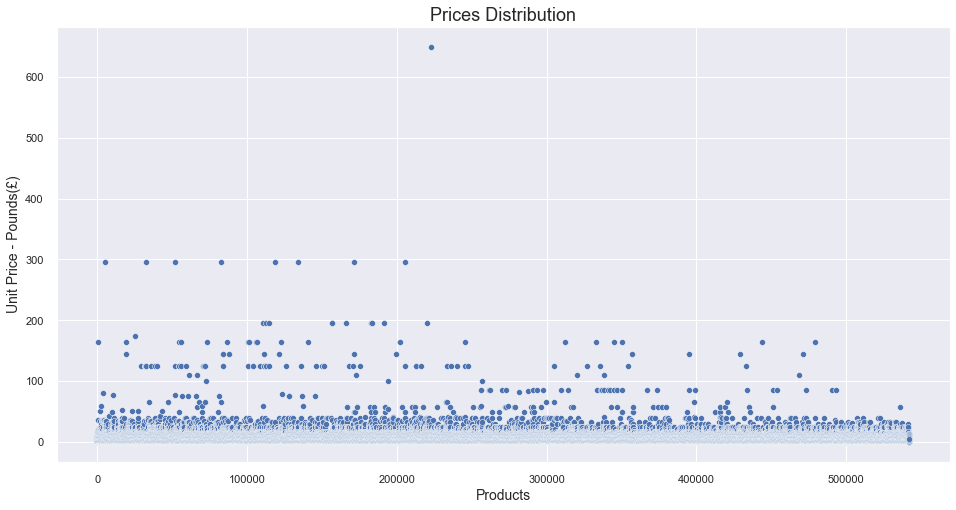

In [68]:
# Prices Distribution.

sns.scatterplot(x = df.index, y = df['UnitPrice'])
plt.title('Prices Distribution', fontsize = 18)
plt.xlabel('Products', fontsize = 14)
plt.ylabel('Unit Price - Pounds(£)', fontsize = 14);

### Not Sales Analysis

In [69]:
# df_not_sales description

df_not_sales['Description'].unique()

array(['POSTAGE', 'CARRIAGE', 'DOTCOM POSTAGE', 'Manual', 'Bank Charges',
       'AMAZON FEE', 'Adjust bad debt'], dtype=object)

In [70]:
df_not_sales.isna().sum()

CustomerID     766
Country          0
InvoiceDate      0
InvoiceNo        0
Description      0
UnitPrice        0
StockCode        0
Quantity         0
some_code        0
dtype: int64

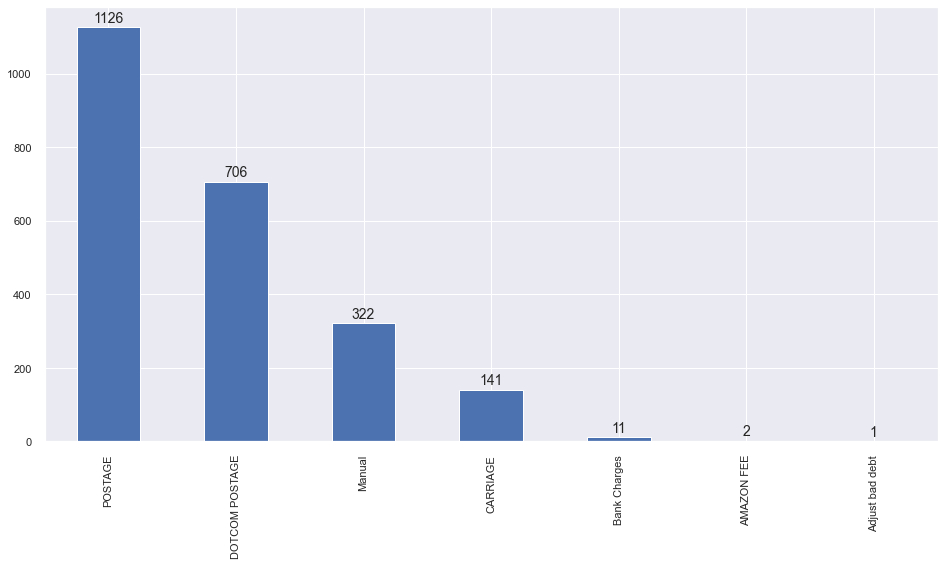

In [71]:
# df_not_sales description distribution

ax = df_not_sales['Description'].value_counts().plot(kind = 'bar')
annot_plot(ax)

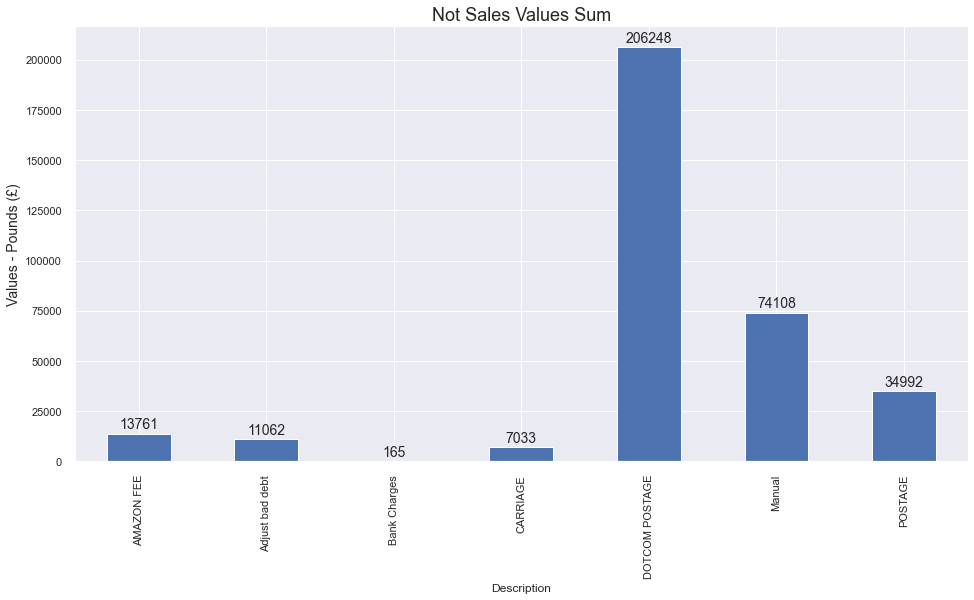

In [72]:
# df_not_sales 'Description' values.

ax = df_not_sales.groupby('Description')['UnitPrice'].sum().plot(kind = 'bar')
plt.title('Not Sales Values Sum', fontsize = 18)
plt.ylabel('Values - Pounds (£)', fontsize = 14)
annot_plot(ax)

### Actual Sales Analysis

In [73]:
df.describe().T

count      mean      std       min       25%       50%       75%       max
CustomerID               391149.00  15295.17  1710.34  12346.00  13969.00  15159.00  16794.00  18287.00
InvoiceNo                522569.00 559962.10 13420.84 536365.00 547906.00 560689.00 571809.00 581587.00
UnitPrice                522569.00      3.28     4.40      0.04      1.25      2.08      4.13    649.50
Quantity                 522569.00     10.64   156.59      1.00      1.00      4.00     12.00  80995.00
TotalValue               522569.00     19.61   269.93      0.06      3.90      9.90     17.70 168469.60
InvoiceYear              522569.00   2016.92     0.27   2016.00   2017.00   2017.00   2017.00   2017.00
InvoiceMonth             522569.00      7.49     3.50      1.00      5.00      8.00     11.00     12.00
InvoiceDayWeek           522569.00      2.66     2.13      0.00      1.00      2.00      5.00      6.00
days_since_last_purchase 522569.00    158.87   115.85      1.00     52.00    143.00    257.00    374.00

In [74]:
print(f'There are {len(df[df["Quantity"] < 0])} negative values, they are discounts and returns and has an impact on previously created features.')

There are 0 negative values, they are discounts and returns and has an impact on previously created features.


In [75]:
# Grouping Total Invoice values by year to get the mean sale by invoice by year

year_group_mean = df.groupby('InvoiceYear')['TotalValue'].mean()
year_group_mean = pd.DataFrame(year_group_mean)
year_group_mean.reset_index(inplace = True)
year_group_mean

InvoiceYear  TotalValue
0         2016       19.00
1         2017       19.66

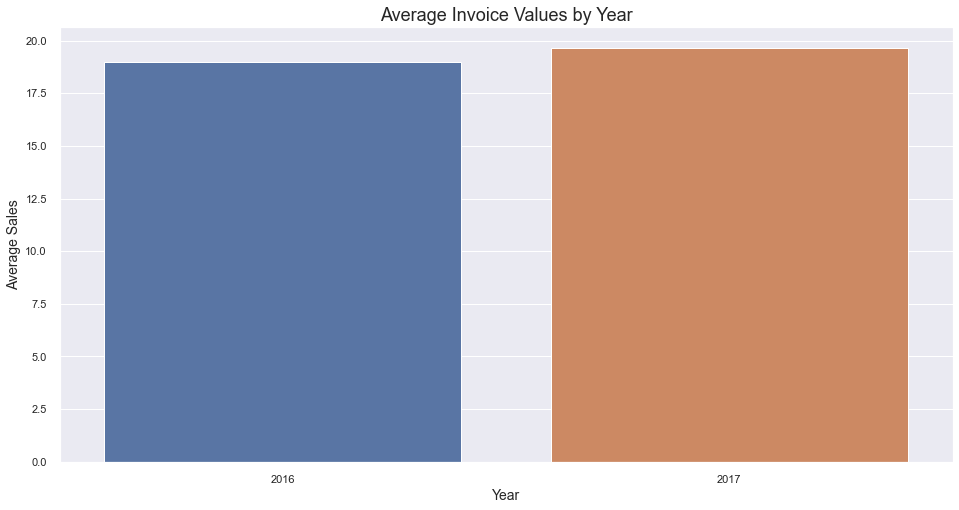

In [76]:
ax = sns.barplot(x = 'InvoiceYear', y = 'TotalValue',data = year_group_mean)
info_plot('Average Invoice Values by Year', 'Year', 'Average Sales')

In [77]:
# Grouping Total Sales by year 

year_group_sum = df.groupby('InvoiceYear')['TotalValue'].sum()
year_group_sum = pd.DataFrame(year_group_sum)
year_group_sum.reset_index(inplace = True)
year_group_sum

InvoiceYear  TotalValue
0         2016   775714.95
1         2017  9472249.33

In [78]:
# Grouping by year and by month

df_byMonth = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalValue'].sum()
df_byMonth = pd.DataFrame(df_byMonth)
df_byMonth.reset_index(inplace = True)
df_byMonth

# November 2016 - only 2 days of sales.
# December 2017 - only 7 days of sales.

InvoiceYear  InvoiceMonth  TotalValue
0          2016            11   105038.75
1          2016            12   670676.20
2          2017             1   719104.18
3          2017             2   502201.30
4          2017             3   671649.94
5          2017             4   497506.19
6          2017             5   784946.06
7          2017             6   698951.08
8          2017             7   722230.94
9          2017             8   754086.87
10         2017             9   963125.13
11         2017            10  1165510.72
12         2017            11  1484959.99
13         2017            12   507976.93

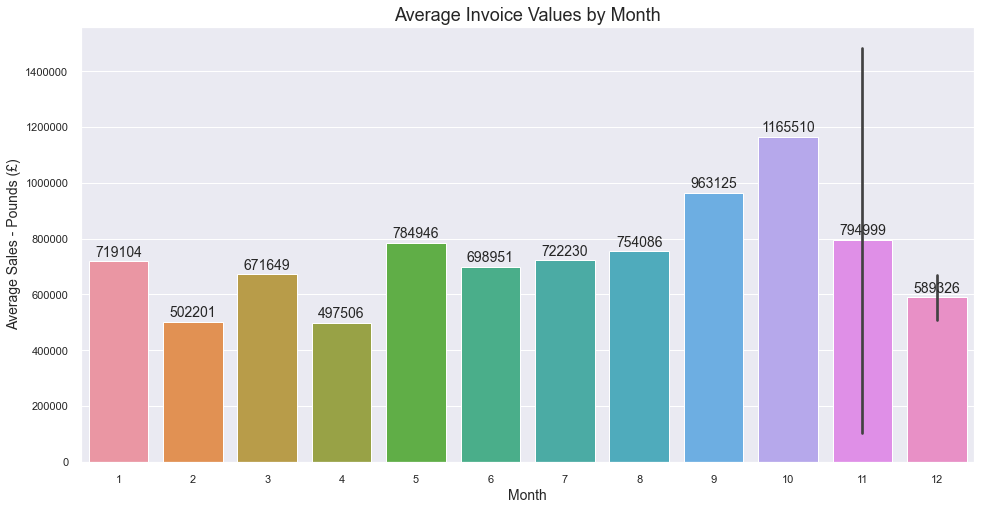

In [79]:
ax = sns.barplot(x = 'InvoiceMonth', y = 'TotalValue',data = df_byMonth)
info_plot('Average Invoice Values by Month', 'Month', 'Average Sales - Pounds (£)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
annot_plot(ax)

In [80]:
# There are no fridays at the dataset.

df['InvoiceDayWeek'].unique()

array([1, 2, 3, 5, 6, 0], dtype=int64)

In [81]:
df['InvoiceDayWeek'].value_counts(sort = False)

0    98250
1    91073
2    99765
3    79235
5    62207
6    92039
Name: InvoiceDayWeek, dtype: int64

In [82]:
# Input Fridays values

friday = [{'InvoiceDayWeek': 4, 'TotalValue': 0, 'AVG_by_day': 0}]
friday = pd.DataFrame(friday)
friday

InvoiceDayWeek  TotalValue  AVG_by_day
0               4           0           0

In [83]:
# groupng by day of week

df_by_DayOfWeek_group = df.groupby('InvoiceDayWeek')['TotalValue'].sum()
df_by_DayOfWeek = pd.DataFrame(df_by_DayOfWeek_group)
df_by_DayOfWeek.reset_index(inplace = True)
df_by_DayOfWeek['AVG_by_day'] = df.groupby('InvoiceDayWeek')['TotalValue'].mean().values

In [84]:
df_by_DayOfWeek = pd.concat([df_by_DayOfWeek, friday], sort = True)
# df_by_DayOfWeek.columns = ['InvoiceDayWeek', 'TotalValue', 'AVG_by_day']
df_by_DayOfWeek.sort_values(by = 'InvoiceDayWeek', inplace = True)

In [85]:
# There is none Fridays at the dataset.

df_by_DayOfWeek.reset_index(inplace = True, drop = True)
df_by_DayOfWeek

AVG_by_day  InvoiceDayWeek  TotalValue
0       21.22               0  2085115.32
1       19.57               1  1782498.93
2       21.37               2  2131755.60
3       22.30               3  1767237.27
4        0.00               4        0.00
5       12.83               5   798307.60
6       18.29               6  1683049.56

In [86]:
df_by_DayOfWeek_group2 = df.groupby(['InvoiceDate', 'InvoiceDayWeek'])['TotalValue'].sum()
df_by_DayOfWeek2 = pd.DataFrame(df_by_DayOfWeek_group2)
df_by_DayOfWeek2.reset_index(inplace = True)

In [87]:
df_by_DayOfWeek2.head()

InvoiceDate  InvoiceDayWeek  TotalValue
0  2016-11-29               1    57442.33
1  2016-11-30               2    47596.42
2  2016-12-01               3    44788.90
3  2016-12-03               5    30908.67
4  2016-12-04               6    51667.12

In [88]:
# Finding mean sales by day of week

df_by_DayOfWeek_group3 = df_by_DayOfWeek2.groupby('InvoiceDayWeek')['TotalValue'].mean()
df_by_DayOfWeek3 = pd.DataFrame(df_by_DayOfWeek_group3)
df_by_DayOfWeek3.reset_index(inplace = True)
df_by_DayOfWeek3 = pd.concat([df_by_DayOfWeek3, friday], sort = True)
df_by_DayOfWeek3.drop(columns = 'AVG_by_day', inplace = True)
df_by_DayOfWeek3.sort_values(by = 'InvoiceDayWeek', inplace = True)

In [89]:
df_by_DayOfWeek3.columns = ['InvoiceDayWeek', 'AVG_by_day']
df_by_DayOfWeek3

InvoiceDayWeek  AVG_by_day
0               0    40098.37
1               1    33632.06
2               2    40221.80
3               3    35344.75
0               4        0.00
4               5    15966.15
5               6    35809.57

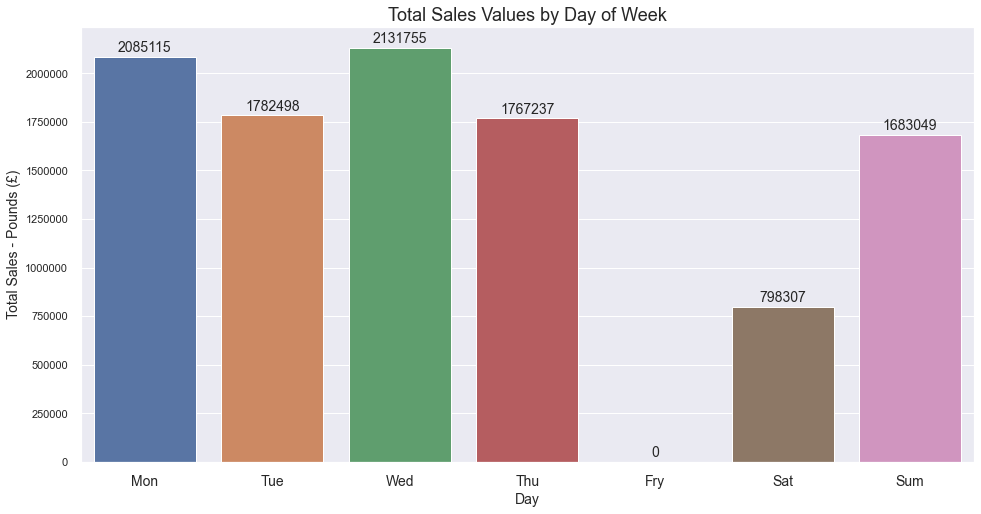

In [90]:
ax1 = sns.barplot(x = df_by_DayOfWeek['InvoiceDayWeek'], y = df_by_DayOfWeek['TotalValue'])
info_plot('Total Sales Values by Day of Week', 'Day', 'Total Sales - Pounds (£)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fry', 'Sat', 'Sum'], fontsize = 14)
annot_plot(ax1)

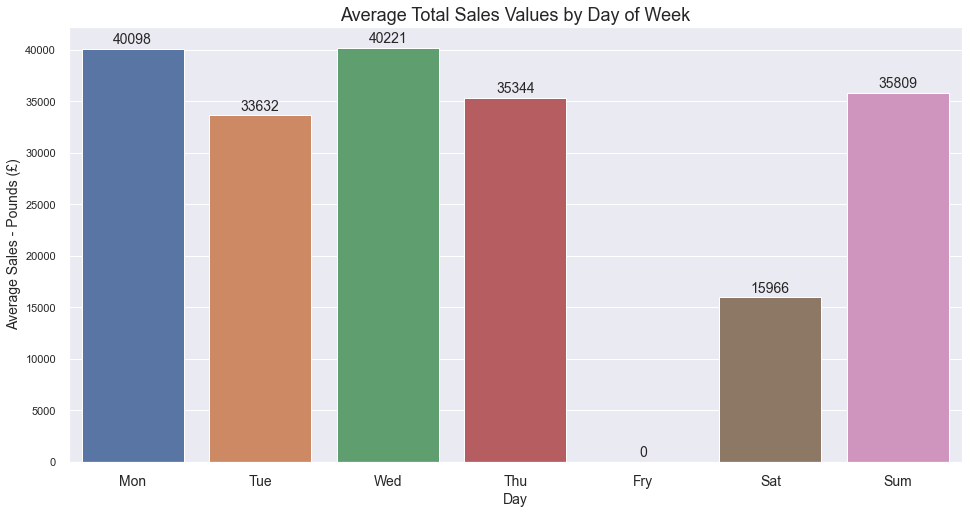

In [91]:
ax2 = sns.barplot(x = df_by_DayOfWeek3['InvoiceDayWeek'], y = df_by_DayOfWeek3['AVG_by_day'])
info_plot('Average Total Sales Values by Day of Week', 'Day', 'Average Sales - Pounds (£)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fry', 'Sat', 'Sum'], fontsize = 14)
annot_plot(ax2)

## Customer ID dataset

In [92]:
customer_report = ProfileReport(df_customer, 'Insiders Program Customer Dataset Report.')
customer_report

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [93]:
# Saving the report to further use.

report.to_file(output_file = local_path + r'\df_customer_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

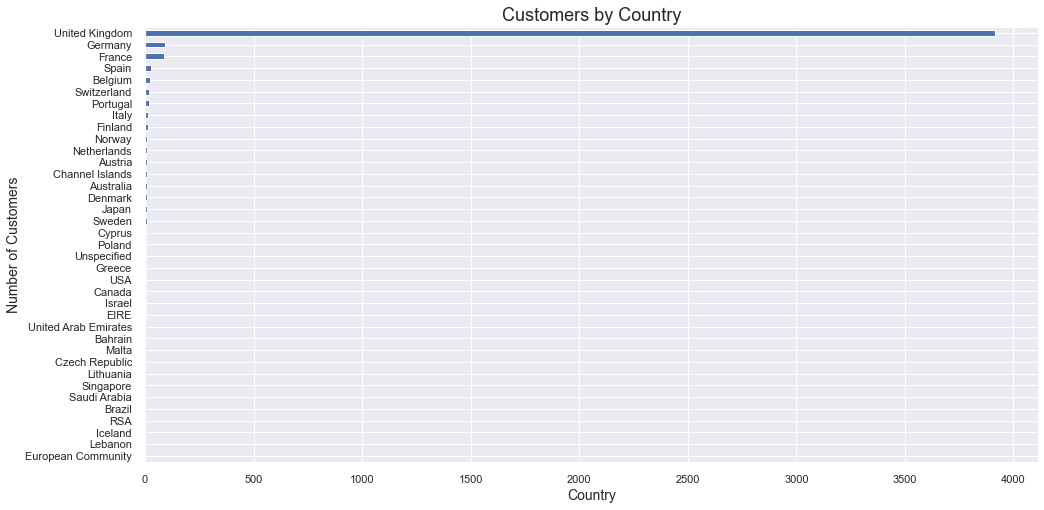

In [94]:
ax = df_customer.groupby('Country')['Country'].count().sort_values().plot(kind = 'barh')
info_plot('Customers by Country', 'Country', 'Number of Customers')
ax;

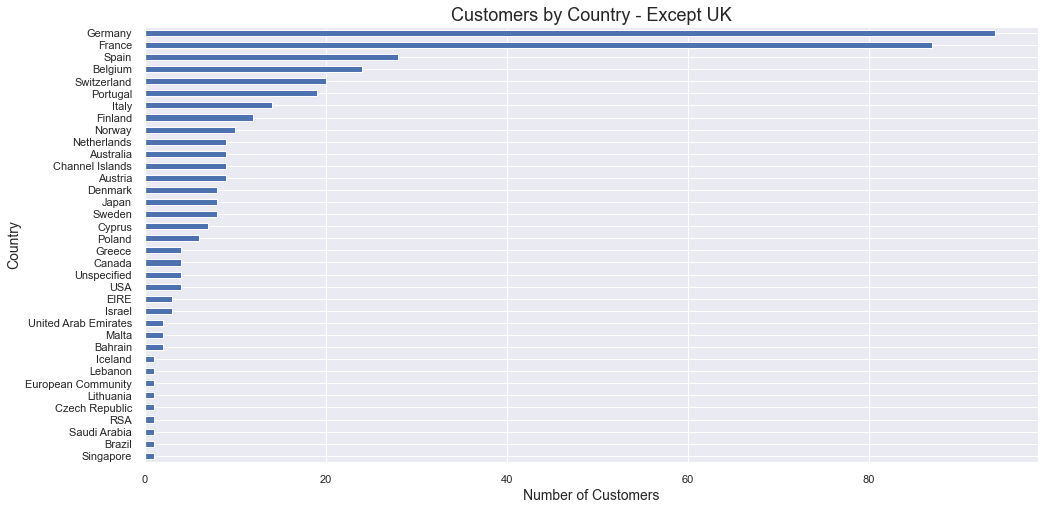

In [95]:
# Country with more customers - Except UK
df_customer_noUK = df_customer.query("Country != 'United Kingdom'")
df_customer_noUK.groupby('Country')['CustomerID'].count().sort_values().plot(kind = 'barh')
info_plot('Customers by Country - Except UK', 'Number of Customers', 'Country');


In [96]:
df_customer_noUK.head()

CustomerID  Country  total_invoices  total_spend  total_itens_purchased  Avg_spend_by_invoice  last_purchase_(days)
2    12347.00  Iceland             182      4310.00                   2458                 23.68                     3
3    12348.00  Finland              27      1437.24                   2332                 53.23                    76
4    12349.00    Italy              72      1457.55                    630                 20.24                    19
5    12350.00   Norway              16       294.40                    196                 18.40                   311
6    12352.00   Norway              77      1385.74                    526                 18.00                    37

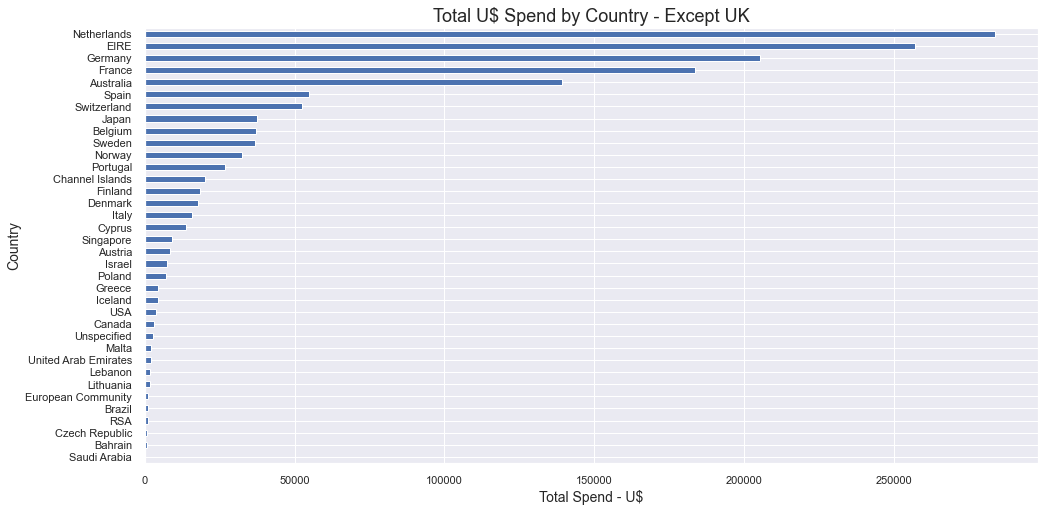

In [97]:
df_customer_noUK.groupby('Country')['total_spend'].sum().sort_values().plot(kind = 'barh')
info_plot('Total U$ Spend by Country - Except UK', 'Total Spend - U$', 'Country');

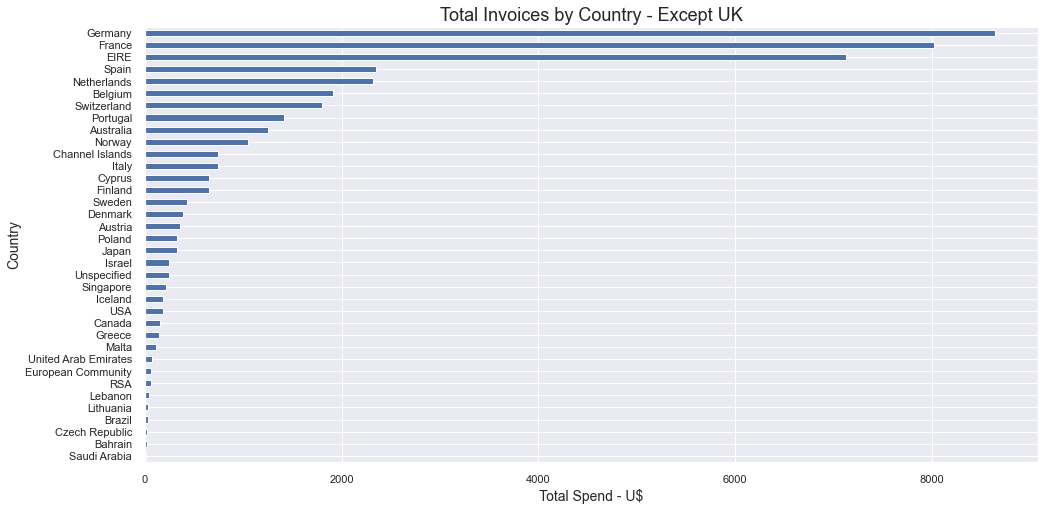

In [98]:
df_customer_noUK.groupby('Country')['total_invoices'].sum().sort_values().plot(kind = 'barh')
info_plot('Total Invoices by Country - Except UK', 'Total Spend - U$', 'Country');

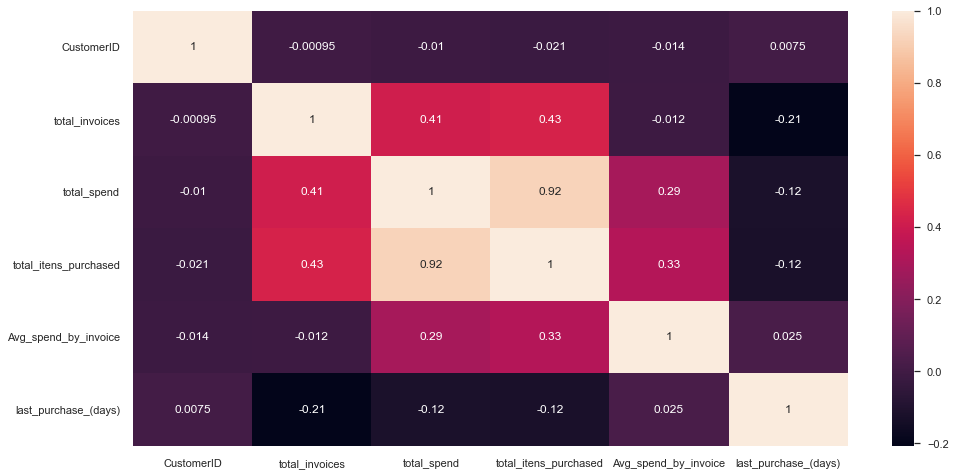

In [99]:
# Correlation

corr = df_customer.corr()
sns.heatmap(corr, annot = True);

# Data Preparation

In [149]:
df_customer_2 = df_customer.copy()
df_customer_2.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  last_purchase_(days)
1    12346.00  United Kingdom               1     77183.60                  74215                   326
2    12347.00         Iceland             182      4310.00                   2458                     3
3    12348.00         Finland              27      1437.24                   2332                    76
4    12349.00           Italy              72      1457.55                    630                    19
5    12350.00          Norway              16       294.40                    196                   311

In [150]:
# Droping categorical features
df_customer_2.drop(columns = ['CustomerID', 'Country'],inplace = True)

In [151]:
# Standard Scaler

scaler = StandardScaler()
df_customer_scaled = scaler.fit_transform(df_customer_2)

df_customer_scaled = pd.DataFrame(columns=[df_customer_2.columns], data=df_customer_scaled)

In [152]:
df_customer_scaled.head(2)

total_invoices total_spend total_itens_purchased last_purchase_(days)
0          -0.40        8.44                 14.49                 2.32
1           0.41        0.26                  0.25                -0.90

# Models Tests

## KMeans


### Model

In [153]:
df_customer_kmeans = df_customer.copy()

In [154]:
# Finding best K

k_clusters = [i for i in range(2, 10)]

silhouette_score_values = []
silhouette_score_values2 = []

for k in k_clusters:
    df_customer_Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=10)
    labels = df_customer_Kmeans.fit_predict(df_customer_scaled.values)
    silhouette_score_values.append(silhouette_score(df_customer_scaled, labels))
    silhouette_score_values2.append([k, silhouette_score(df_customer_scaled, labels)])

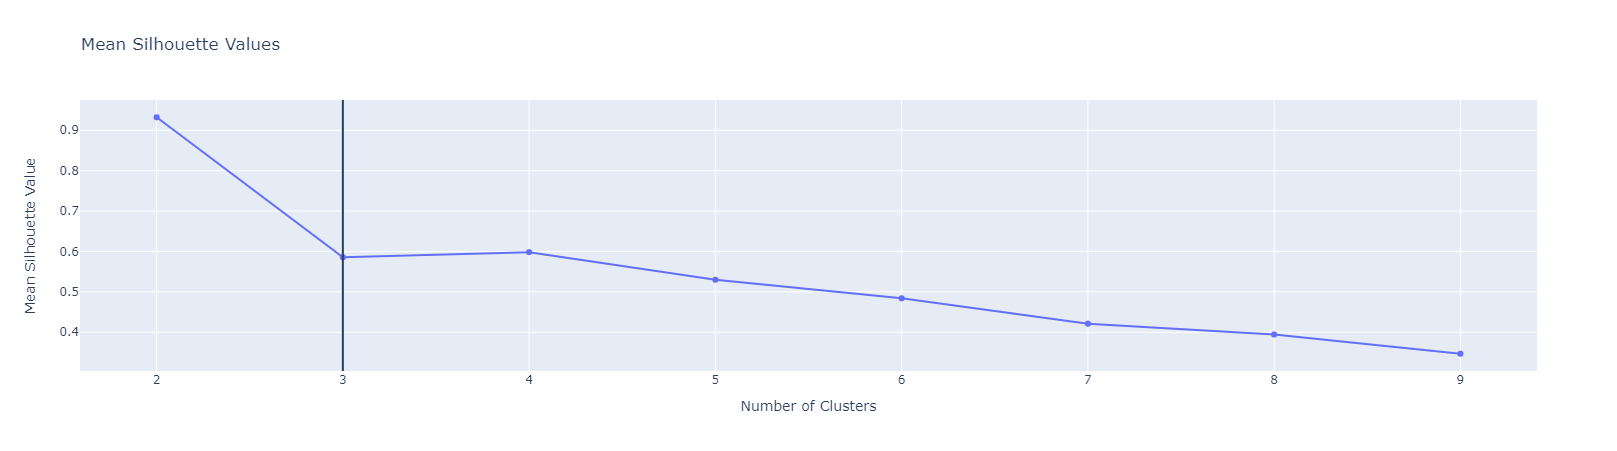

In [155]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = silhouette_score_values))

fig.update_layout(title = 'Mean Silhouette Values', xaxis_title = 'Number of Clusters', yaxis_title = 'Mean Silhouette Value')
fig.add_vline(x = 3)

fig.show()

In [156]:
# Best Silhouette Score value
kmeans_SS = pd.DataFrame(silhouette_score_values2, columns = ['K', 'silhouette_score'])
kmeans_SS.style.highlight_max(color = 'darkorange')

In [157]:
# Instancing model

k = 3

Kmeans = KMeans(n_clusters = k, random_state=42, init='random', n_init=10, max_iter=300)
Kmeans.fit(df_customer_scaled.values)
labels = Kmeans.labels_

In [158]:
df_customer_kmeans['clusters'] = Kmeans.predict(df_customer_scaled)

In [159]:
df_customer_kmeans['clusters'].value_counts()

0    3230
2    1086
1      18
Name: clusters, dtype: int64

### Evaluation - KMeans

For n_clusters = 2 The average silhouette_score is : 0.932122484190457
For n_clusters = 3 The average silhouette_score is : 0.5855510236543461
For n_clusters = 4 The average silhouette_score is : 0.5968743951276784
For n_clusters = 5 The average silhouette_score is : 0.5946541395898763
For n_clusters = 6 The average silhouette_score is : 0.5074173040310467


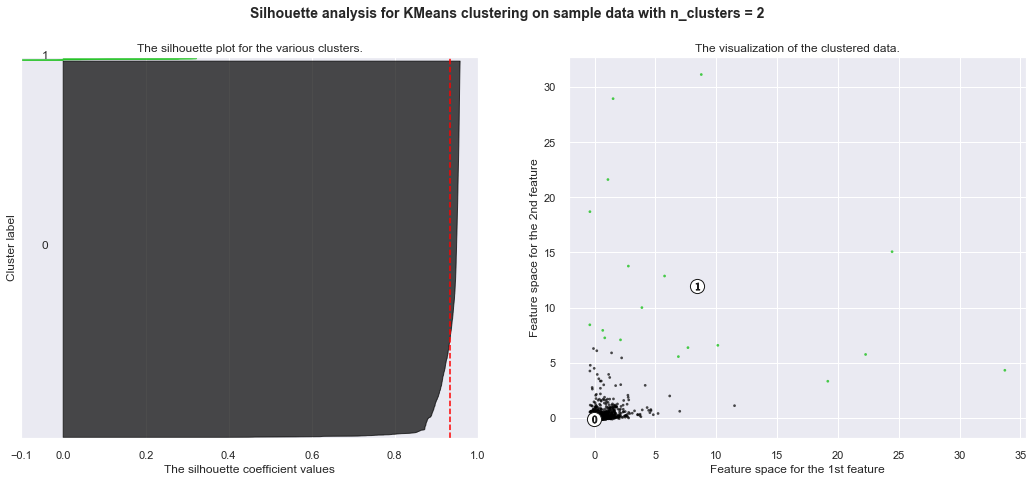

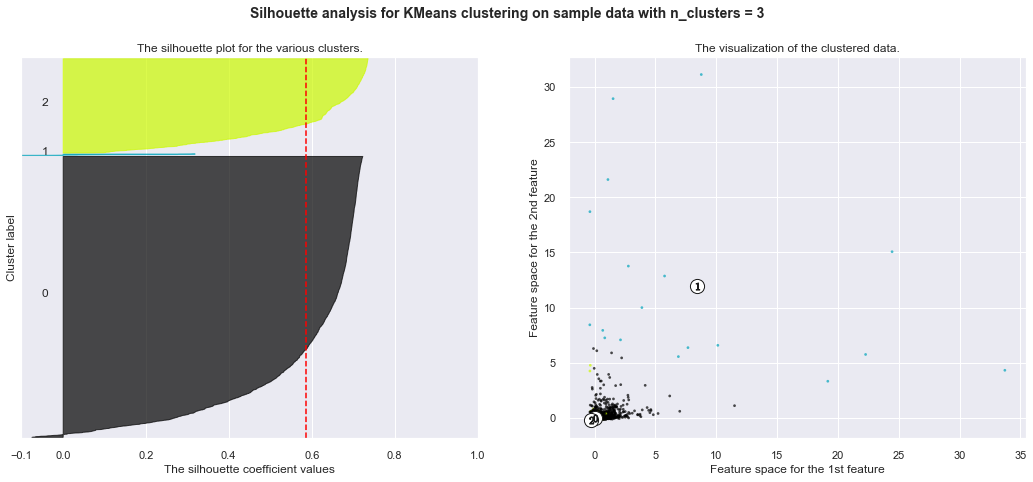

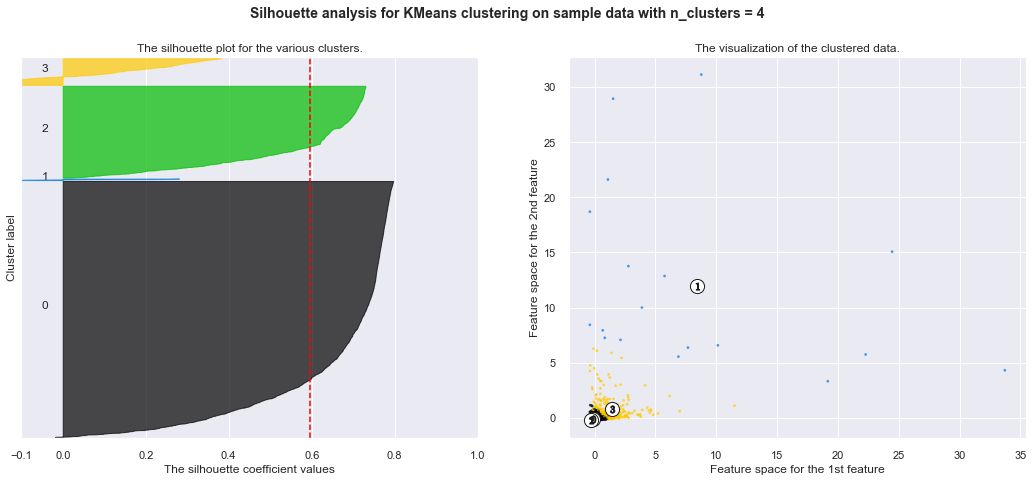

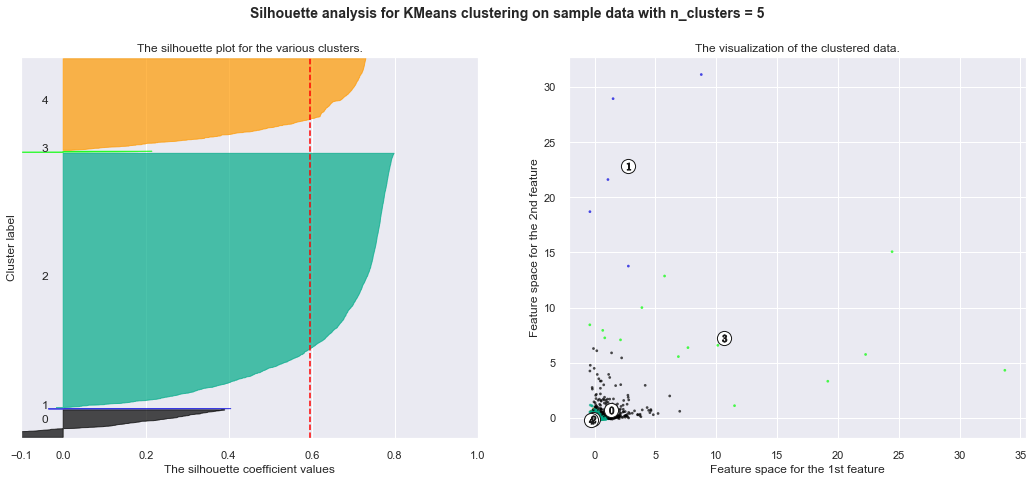

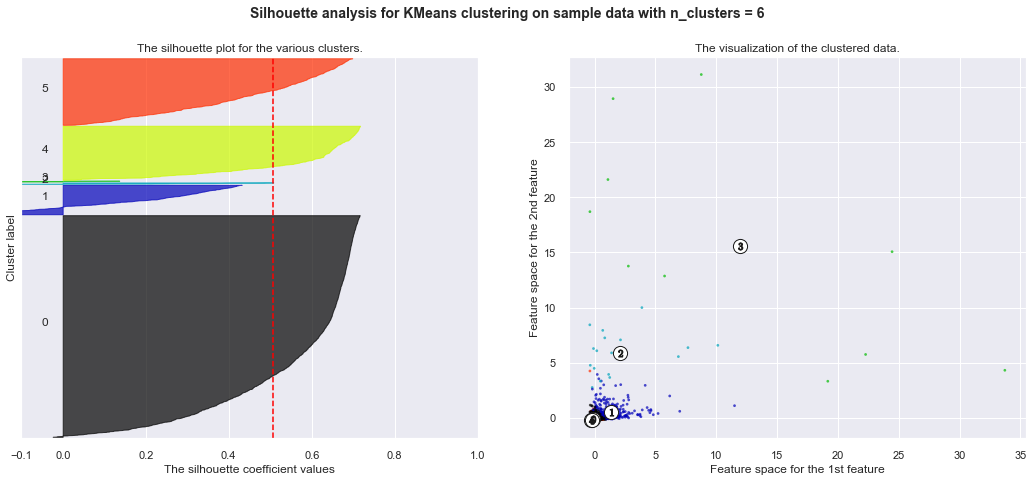

In [160]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_customer_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='random', n_init=10, max_iter=300)
    cluster_labels = clusterer.fit_predict(df_customer_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_customer_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_customer_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_customer_scaled.values[:, 0], df_customer_scaled.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

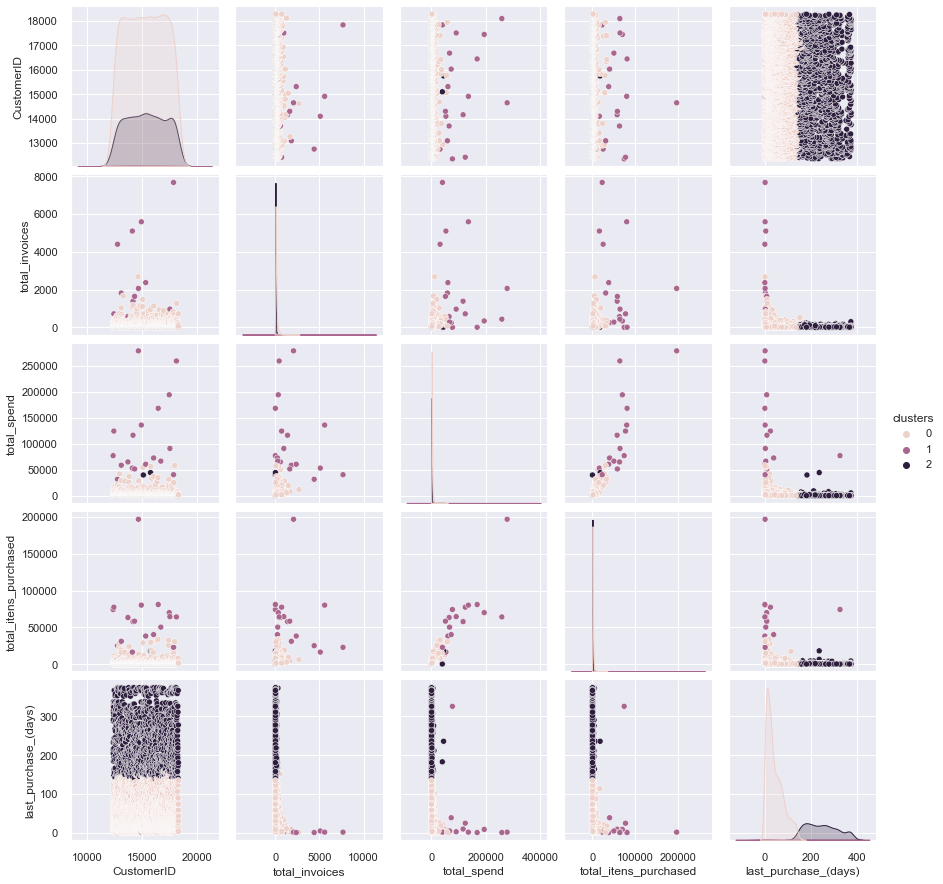

In [161]:
sns.pairplot(df_customer_kmeans, hue = 'clusters')

In [162]:
# WSS - Whitin-Cluster Sum of Square

wss = Kmeans.inertia_
print(f'WSS: {wss}')

# Silhouette Score

ss = silhouette_score(df_customer_scaled, Kmeans.labels_)
print(f'SS: {ss}')

# Davies-Bouldin Index

dbi = davies_bouldin_score(df_customer_scaled, Kmeans.labels_)
print(f'DBI: {dbi}')

# Calinski Harabasz Index

chi = calinski_harabasz_score(df_customer_scaled, Kmeans.labels_)
print(f'CHI: {chi}')

WSS: 7319.226960768609
SS: 0.5855510236543461
DBI: 0.6942312417453261
CHI: 2963.608333601628


In [163]:
# KMeans Evaluation 

df_kmeans_results = [{'Model': 'KMeans - k = 3', 
                  'WSS': wss,
                  'silhouette_score': ss,
                  'davies_bouldin': dbi,
                  'calinski_harabasz': chi}]

df_kmeans_eval = pd.DataFrame(df_kmeans_results)
df_kmeans_eval                                                   

Model     WSS  silhouette_score  davies_bouldin  calinski_harabasz
0  KMeans - k = 3 7319.23              0.59            0.69            2963.61

### KMeans Cluster Report

In [164]:
df_customer_kmeans['clusters'] = labels
df_customer_kmeans.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  last_purchase_(days)  clusters
1    12346.00  United Kingdom               1     77183.60                  74215                   326         1
2    12347.00         Iceland             182      4310.00                   2458                     3         0
3    12348.00         Finland              27      1437.24                   2332                    76         0
4    12349.00           Italy              72      1457.55                    630                    19         0
5    12350.00          Norway              16       294.40                    196                   311         2

<AxesSubplot:xlabel='total_invoices', ylabel='total_spend'>

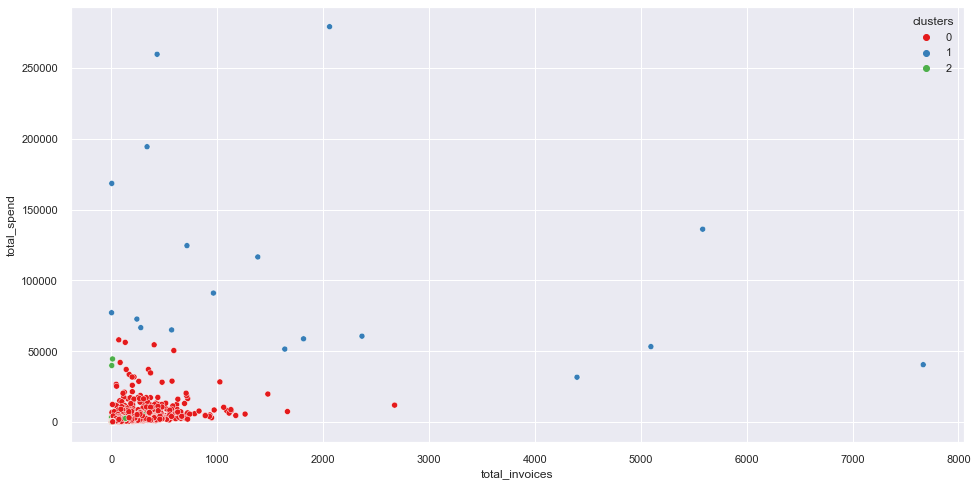

In [165]:
sns.scatterplot(x = 'total_invoices', y = 'total_spend', hue = 'clusters', data = df_customer_kmeans, palette = sns.color_palette('Set1', 3))

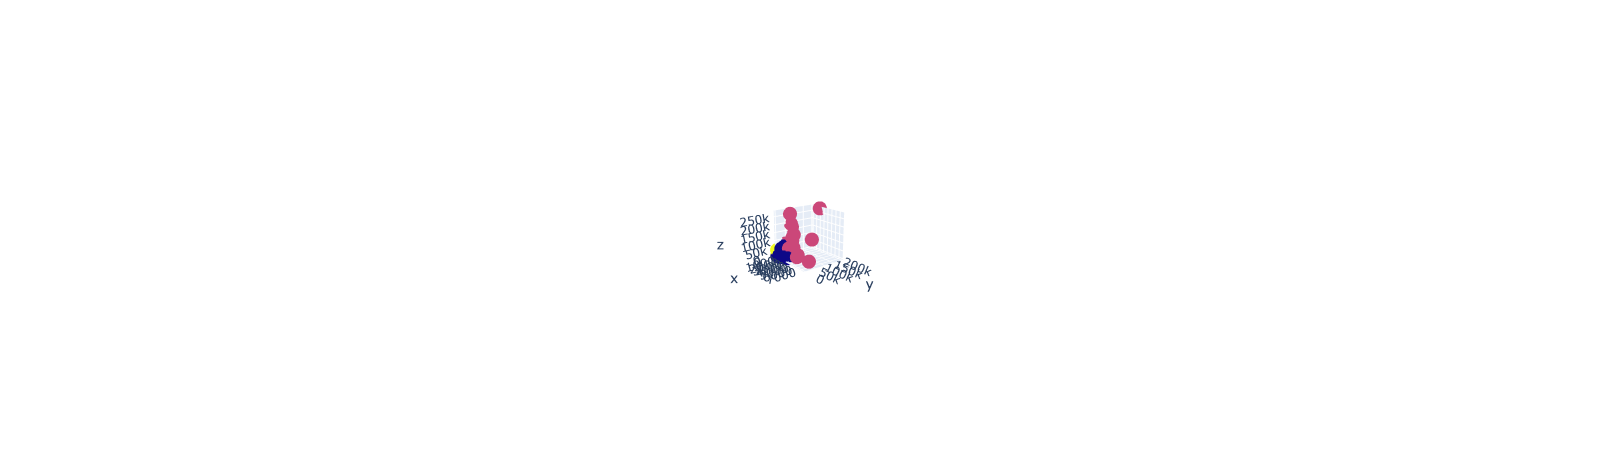

In [168]:
# 3D plot KMeans

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_customer_kmeans['total_invoices'], y = df_customer_kmeans['total_itens_purchased'], z = df_customer_kmeans['total_spend'],
                          mode = 'markers', marker = dict(color = Kmeans.labels_.astype(np.float)),
                          text = Kmeans.labels_))

fig.show()

In [169]:
# Number of Customers
df_insiders_report_KMeans = df_customer_kmeans[['CustomerID','clusters']].groupby('clusters').count().reset_index()
df_insiders_report_KMeans['perc_customer'] = 100 * (df_insiders_report_KMeans['CustomerID'] / df_insiders_report_KMeans['CustomerID'].sum())

# AVG Total_Spend
df_insiders_report_KMeans['AVG_total_spend'] = df_customer_kmeans[['total_spend', 'clusters']].groupby('clusters').mean()

# AVG total_invoices
df_insiders_report_KMeans['AVG_total_invoices'] = df_customer_kmeans[['total_invoices', 'clusters']].groupby('clusters').mean()

# AVG last_purchase
df_insiders_report_KMeans['AVG_last_purchase'] = df_customer_kmeans[['last_purchase_(days)', 'clusters']].groupby('clusters').mean()

# AVG total_itens_purchased
df_insiders_report_KMeans['AVG_total_itens_purchased'] = df_customer_kmeans[['total_itens_purchased', 'clusters']].groupby('clusters').mean()

In [170]:
df_insiders_report_KMeans

clusters  CustomerID  perc_customer  AVG_total_spend  AVG_total_invoices  AVG_last_purchase  AVG_total_itens_purchased
0         0        3230          74.53          1913.83              100.87              41.76                    1150.62
1         1          18           0.42        108217.76             1974.11              24.89                   61743.11
2         2        1086          25.06           559.53               27.46             247.43                     289.05

In [172]:
kmeans_cluster_analysis_list = []

for c in range(3):
    kmeans_cluster_analysis = {}
    kmeans_cluster_analysis['cluster'] = c
    kmeans_cluster_analysis['total_customers'] = len(df_customer_kmeans[df_customer_kmeans["clusters"] == c])
    kmeans_cluster_analysis['Max_total_invoices'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["total_invoices"].max()
    kmeans_cluster_analysis['Min_total_invoices'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["total_invoices"].min()
    kmeans_cluster_analysis['Max_total_spend'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["total_spend"].max()
    kmeans_cluster_analysis['Min_total_spend'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["total_spend"].min()
    kmeans_cluster_analysis['Max_total_itens_purchased'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["total_itens_purchased"].max()
    kmeans_cluster_analysis['Min_total_itens_purchased'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["total_itens_purchased"].min()
    #kmeans_cluster_analysis['Max_Avg_spend_by_invoice'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["Avg_spend_by_invoice"].max()
    #kmeans_cluster_analysis['Min_Avg_spend_by_invoice'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["Avg_spend_by_invoice"].min()
    kmeans_cluster_analysis['Max_last_purchase_(days)'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["last_purchase_(days)"].max()
    kmeans_cluster_analysis['Min_last_purchase_(days)'] = df_customer_kmeans[df_customer_kmeans["clusters"] == c]["last_purchase_(days)"].min()
    kmeans_cluster_analysis_list.append(kmeans_cluster_analysis)

df_kmeans_customer = pd.DataFrame(kmeans_cluster_analysis_list)
df_kmeans_customer

cluster  total_customers  Max_total_invoices  Min_total_invoices  Max_total_spend  Min_total_spend  Max_total_itens_purchased  Min_total_itens_purchased  Max_last_purchase_(days)  Min_last_purchase_(days)
0        0             3230                2674                   1         58030.48             5.90                      33704                          2                       157                         1
1        1               18                7667                   1        279138.02         31650.78                     196844                      16336                       326                         1
2        2             1086                 297                   1         44534.30             3.75                      18028                          1                       374                       139

In [173]:
# Cluster Insiders:

df_customer_kmeans[df_customer_kmeans["clusters"] == 1].sort_values(by = 'total_spend', ascending = False)

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  last_purchase_(days)  clusters
1690    14646.00     Netherlands            2060    279138.02                 196844                     2         1
4198    18102.00  United Kingdom             431    259657.30                  64124                     1         1
3726    17450.00  United Kingdom             336    194390.79                  69973                     9         1
3007    16446.00  United Kingdom               3    168472.50                  80997                     1         1
1880    14911.00            EIRE            5584    136161.83                  80154                     2         1
56      12415.00       Australia             713    124564.53                  77373                    25         1
1334    14156.00            EIRE            1382    116560.08                  57755                    10         1
3769    17511.00  United Kingdom             963     91062.38                  64549                     3         1
1       12346.00  United Kingdom               1     77183.60                  74215                   326         1
2701    16029.00  United Kingdom             240     72708.09                  40107                    39         1
3175    16684.00  United Kingdom             277     66653.56                  50255                     5         1
997     13694.00  United Kingdom             568     65039.62                  63312                     4         1
2177    15311.00  United Kingdom            2366     60632.75                  38147                     1         1
563     13089.00  United Kingdom            1814     58762.08                  31025                     3         1
1290    14096.00  United Kingdom            5095     53258.43                  16336                     5         1
1435    14298.00  United Kingdom            1637     51527.30                  58343                     9         1
4008    17841.00  United Kingdom            7667     40495.99                  22816                     2         1
327     12748.00  United Kingdom            4397     31650.78                  25051                     1         1

### TSNE Visualization - KMeans

<AxesSubplot:>

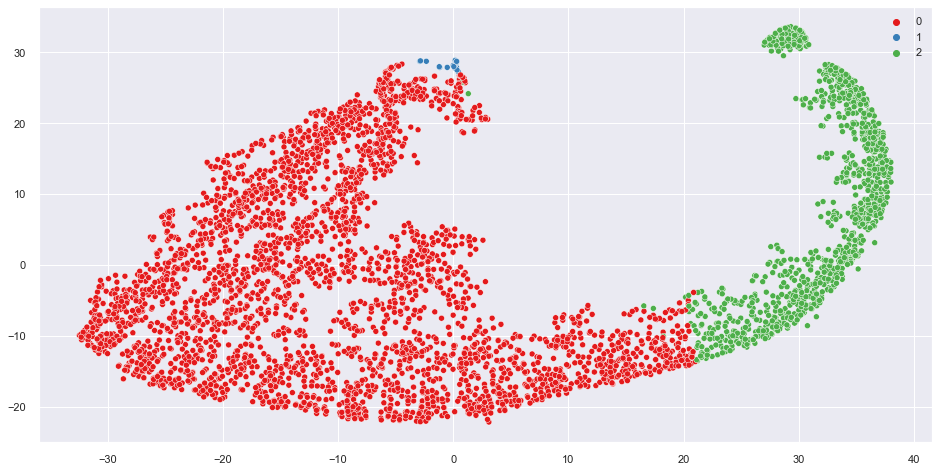

In [176]:
# TSNE - high-dimensional visualize data.

tsne = TSNE(perplexity=136)

visualization = tsne.fit_transform(X = df_customer_scaled)

sns.scatterplot(x = visualization[:,0], y = visualization[:,1], hue = Kmeans.labels_, palette = sns.color_palette('Set1', 3))

## DBSCAN

### Model

In [197]:
df_customer_DB = df_customer.copy()

In [231]:
eps = [0.4, 0.6, 0.8, 1, 1.2, 1.4]
min_samples = [15, 20, 30, 40, 50]
SS_list = []
DBI_list = []
CH_list = []


# Finding best eps + min_samples parameters
for e in eps:
    for s in min_samples:
        dbscan_model = DBSCAN(eps = e, min_samples = s, n_jobs = -1)
        db_labels = dbscan_model.fit_predict(df_customer_scaled)
        SS_list.append([e, s, silhouette_score(df_customer_scaled, db_labels)])
        DBI_list.append([e, s, davies_bouldin_score(df_customer_scaled, db_labels)])
        CH_list.append([e, s, calinski_harabasz_score(df_customer_scaled, db_labels)])
        
# Creating a DataFrame to show the best metrics
df_dbscan_ss = pd.DataFrame(SS_list, columns = ['eps', 'min_samples', 'silhouette_score'])
df_dbscan_dbi = pd.DataFrame(DBI_list, columns = ['eps', 'min_samples', 'davies_bouldin_index'])
df_dbscan_ch = pd.DataFrame(CH_list, columns = ['eps', 'min_samples', 'calisnki_harabasz'])
df_dbscan_search = pd.merge(df_dbscan_ss, df_dbscan_dbi, how = 'left', on = ['eps', 'min_samples'])
df_dbscan_search = pd.merge(df_dbscan_search, df_dbscan_ch, how = 'left', on = ['eps', 'min_samples'])

In [233]:
df_dbscan_search.style.highlight_max(color = 'darkorange')

In [234]:
dbscan_model = DBSCAN(eps = 1.4, min_samples = 15, n_jobs = -1)
db_labels = dbscan_model.fit_predict(df_customer_scaled)

In [235]:
np.unique(db_labels)

array([-1,  0], dtype=int64)

In [236]:
df_customer_DB['clusters'] = db_labels
df_customer_DB.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  last_purchase_(days)  clusters
1    12346.00  United Kingdom               1     77183.60                  74215                   326        -1
2    12347.00         Iceland             182      4310.00                   2458                     3         0
3    12348.00         Finland              27      1437.24                   2332                    76         0
4    12349.00           Italy              72      1457.55                    630                    19         0
5    12350.00          Norway              16       294.40                    196                   311         0

In [237]:
df_customer_DB['clusters'].value_counts()

 0    4294
-1      40
Name: clusters, dtype: int64

<AxesSubplot:xlabel='total_invoices', ylabel='total_spend'>

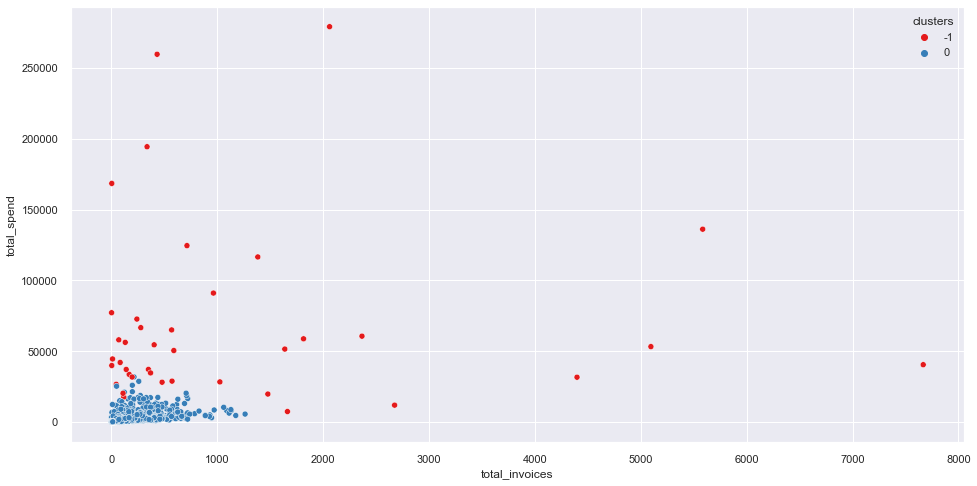

In [238]:
sns.scatterplot(x = 'total_invoices', y = 'total_spend', hue = 'clusters', data = df_customer_DB, palette = sns.color_palette('Set1', 2))

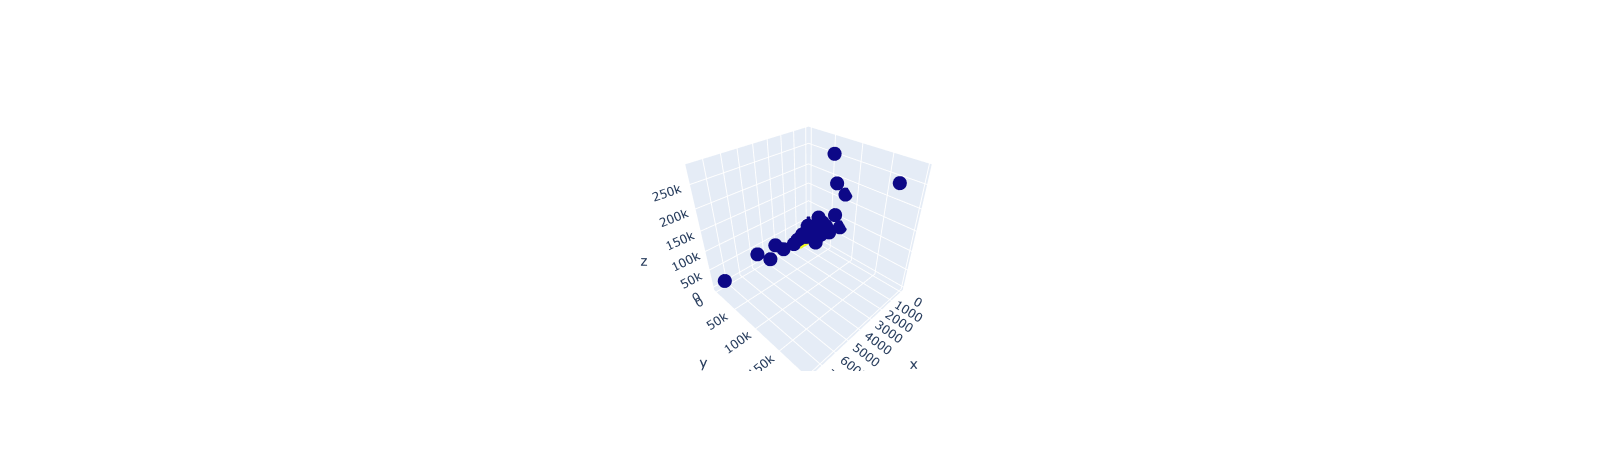

In [239]:
# 3D plot DBSCAN

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_customer_DB['total_invoices'], y = df_customer_DB['total_itens_purchased'], z = df_customer_DB['total_spend'],
                          mode = 'markers', marker = dict(color = db_labels.astype(np.float)),
                          text = db_labels))

fig.show()

### Evaluation

In [243]:
# WSS - Whitin-Cluster Sum of Square

#print(f'WSS: {dbscan_model.inertia_}')

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, dbscan_model.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, dbscan_model.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, dbscan_model.labels_)}')

SS: 0.8903682029279291
DBI: 0.9347153653851819
CHI: 1908.191688106146


For n_clusters = 2.

The average silhouette_score is : 0.8903682029279291.


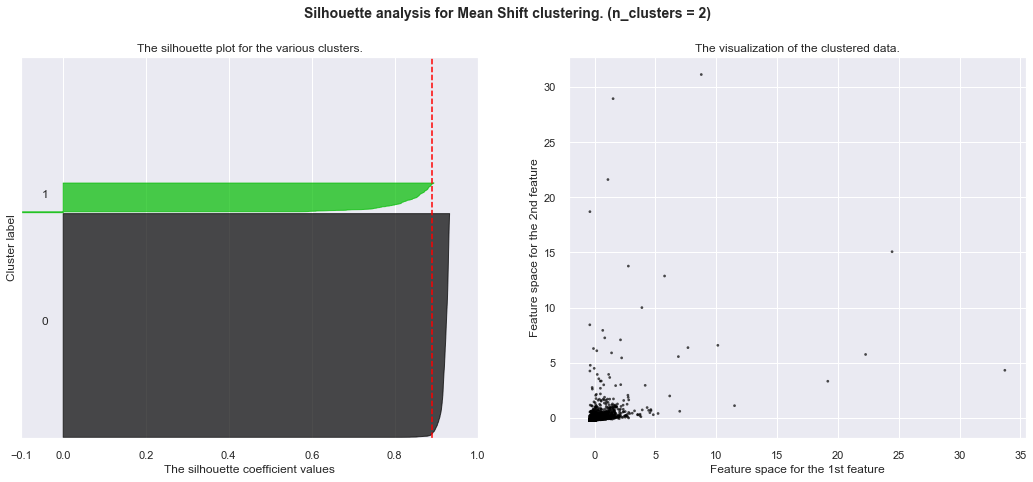

In [286]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_customer_scaled) + (len(np.unique(dbscan_model.labels_)) + 1) * 10])

silhouette_avg = silhouette_score(df_customer_scaled, dbscan_model.fit_predict(df_customer_scaled))
print(f"For n_clusters = {len(np.unique(dbscan_model.labels_))}.\n\nThe average silhouette_score is : {silhouette_avg}.")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_customer_scaled, dbscan_model.fit_predict(df_customer_scaled))

y_lower = 10
for i in range(len(np.unique(dbscan_model.labels_))):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(np.unique(dbscan_model.labels_)))
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(dbscan_model.fit_predict(df_customer_scaled).astype(float) / len(np.unique(dbscan_model.labels_)))
ax2.scatter(df_customer_scaled.values[:, 0], df_customer_scaled.values[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
#centers = dbscan_model.cluster_centers_
# Draw white circles at cluster centers
#ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

#for i, c in enumerate(centers):
    #ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle((f"Silhouette analysis for Mean Shift clustering. (n_clusters = {len(np.unique(dbscan_model.labels_))})"),fontsize=14, fontweight='bold')

plt.show()

### DBSCAN Clusters Report

In [252]:
df_customer_DB.clusters.unique()

array([-1,  0], dtype=int64)

In [245]:
# Number of Customers
df_insiders_report_dbscan = df_customer_DB[['CustomerID','clusters']].groupby('clusters').count().reset_index()
df_insiders_report_dbscan['perc_customer'] = 100 * (df_insiders_report_dbscan['CustomerID'] / df_insiders_report_dbscan['CustomerID'].sum())

# AVG Total_Spend
df_insiders_report_dbscan['AVG_total_spend'] = df_customer_DB[['total_spend', 'clusters']].groupby('clusters').mean().reset_index()['total_spend']

# AVG total_invoices
df_insiders_report_dbscan['AVG_total_invoices'] = df_customer_DB[['total_invoices', 'clusters']].groupby('clusters').mean().reset_index()['total_invoices']

# AVG last_purchase
df_insiders_report_dbscan['AVG_last_purchase'] = df_customer_DB[['last_purchase_(days)', 'clusters']].groupby('clusters').mean().reset_index()['last_purchase_(days)']

# AVG total_itens_purchased
df_insiders_report_dbscan['AVG_total_itens_purchased'] = df_customer_DB[['total_itens_purchased', 'clusters']].groupby('clusters').mean().reset_index()['total_itens_purchased']

In [257]:
dbscam_cluster_analysis_list = []

for c in [-1, 0]:
    dbscam_cluster_analysis = {}
    dbscam_cluster_analysis['cluster'] = c
    dbscam_cluster_analysis['total_customers'] = len(df_customer_DB[df_customer_DB["clusters"] == c])
    dbscam_cluster_analysis['Max_total_invoices'] = df_customer_DB[df_customer_DB["clusters"] == c]["total_invoices"].max()
    dbscam_cluster_analysis['Min_total_invoices'] = df_customer_DB[df_customer_DB["clusters"] == c]["total_invoices"].min()
    dbscam_cluster_analysis['Max_total_spend'] = df_customer_DB[df_customer_DB["clusters"] == c]["total_spend"].max()
    dbscam_cluster_analysis['Min_total_spend'] = df_customer_DB[df_customer_DB["clusters"] == c]["total_spend"].min()
    dbscam_cluster_analysis['Max_total_itens_purchased'] = df_customer_DB[df_customer_DB["clusters"] == c]["total_itens_purchased"].max()
    dbscam_cluster_analysis['Min_total_itens_purchased'] = df_customer_DB[df_customer_DB["clusters"] == c]["total_itens_purchased"].min()
    dbscam_cluster_analysis['Max_last_purchase_(days)'] = df_customer_DB[df_customer_DB["clusters"] == c]["last_purchase_(days)"].max()
    dbscam_cluster_analysis['Min_last_purchase_(days)'] = df_customer_DB[df_customer_DB["clusters"] == c]["last_purchase_(days)"].min()
    dbscam_cluster_analysis_list.append(dbscam_cluster_analysis)

df_dbscam_customer = pd.DataFrame(dbscam_cluster_analysis_list)
df_dbscam_customer

cluster  total_customers  Max_total_invoices  Min_total_invoices  Max_total_spend  Min_total_spend  Max_total_itens_purchased  Min_total_itens_purchased  Max_last_purchase_(days)  Min_last_purchase_(days)
0       -1               40                7667                   1        279138.02          6912.00                     196844                        121                       326                         1
1        0             4294                1262                   1         31833.68             3.75                      14822                          1                       374                         1

In [262]:
df_customer_DB[df_customer_DB['clusters'] == -1].sample(20)

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  last_purchase_(days)  clusters
3175    16684.00  United Kingdom             277     66653.56                  50255                     5        -1
2687    16013.00  United Kingdom             139     37130.60                  15536                     4        -1
1662    14606.00  United Kingdom            2674     11926.15                   6177                     2        -1
4090    17949.00  United Kingdom              69     58030.48                  30450                     2        -1
2920    16333.00  United Kingdom              45     26626.80                  32184                     8        -1
796     13408.00  United Kingdom             478     28117.04                  16232                     2        -1
3769    17511.00  United Kingdom             963     91062.38                  64549                     3        -1
997     13694.00  United Kingdom             568     65039.62                  63312                     4        -1
432     12901.00  United Kingdom             116     17654.54                  23075                     9        -1
1965    15039.00  United Kingdom            1477     19766.59                   9131                    10        -1
454     12931.00  United Kingdom              82     42055.96                  28004                    22        -1
691     13263.00  United Kingdom            1662      7411.71                   4761                     2        -1
563     13089.00  United Kingdom            1814     58762.08                  31025                     3        -1
1880    14911.00            EIRE            5584    136161.83                  80154                     2        -1
4008    17841.00  United Kingdom            7667     40495.99                  22816                     2        -1
2503    15749.00  United Kingdom              10     44534.30                  18028                   236        -1
2989    16422.00  United Kingdom             369     34684.40                  33704                    18        -1
2701    16029.00  United Kingdom             240     72708.09                  40107                    39        -1
2518    15769.00  United Kingdom             130     56252.72                  29672                     8        -1
559     13081.00  United Kingdom            1024     28337.38                  19068                    12        -1

### TSNE Visualization - DBSCAN

In [259]:
df_customer_DB.shape

(4334, 7)

<AxesSubplot:>

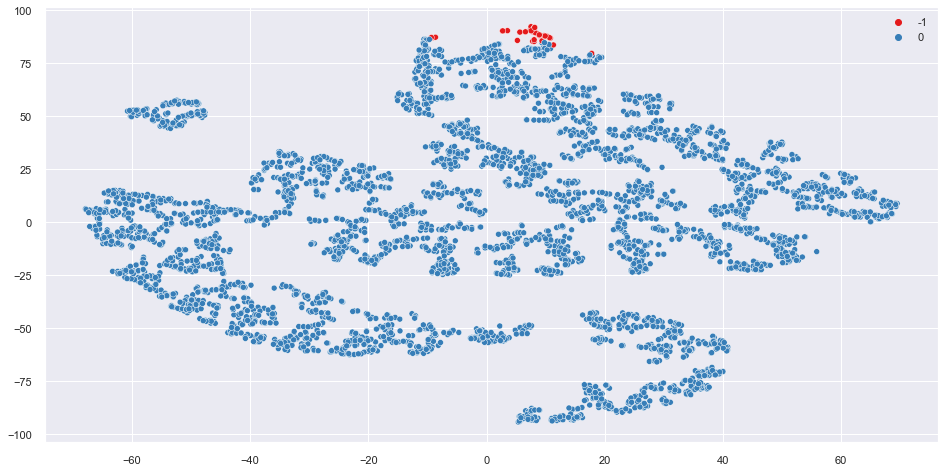

In [263]:
# TSNE - high-dimensional visualize data.

tsne = TSNE(perplexity=25)

visualization = tsne.fit_transform(X = df_customer_scaled)

sns.scatterplot(x = visualization[:,0], y = visualization[:,1], hue = dbscan_model.labels_, palette = sns.color_palette('Set1', 2))

## Mean Shift


### Model 

In [264]:
mean_shift_model = MeanShift()  
mean_shift_model.fit(df_customer_scaled)

np.unique(mean_shift_model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

In [265]:
len(np.unique(mean_shift_model.labels_))

38

In [266]:
# Estimate Bandwidth

BW = estimate_bandwidth(df_customer_scaled)
mean_shift_model_bw = MeanShift(BW)  
mean_shift_model_bw.fit(df_customer_scaled)

np.unique(mean_shift_model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

In [267]:
# Best Estimate Bandwidth Quantile
'''
quantil_range = np.linspace(0.02, 0.5, 30)

silhouette_values = []
quantil_plot = []

for quantil in quantil_range:
    BW = estimate_bandwidth(df_customer_scaled, quantile = quantil)
    mean_shift_model_bw = MeanShift(BW)
    ms_labels = mean_shift_model_bw.fit_predict(df_customer_scaled)
    
    if (len(np.unique(labels)) < len(df_customer_scaled) and len(np.unique(labels)) > 1):
        mean_silhouette = silhouette_score(df_customer_scaled, ms_labels)
        silhouette_values.append(mean_silhouette)
        quantil_plot.append(quantil)
'''

In [ ]:
# Saving Best Estimate bandwidth Quantile Results

silhouette_values = [0.24929177141185693,
                     0.3307007269419875,
                     0.3866947149531192,
                     0.39664899933672876,
                     0.40044696599483537,
                     0.4114993827422125,
                     0.41885960281264994,
                     0.434776487113302,
                     0.47640844132396964,
                     0.4139921782420811,
                     0.48799733715982146,
                     0.4846243837366939,
                     0.42417912681113756,
                     0.48947419971502193,
                     0.4958498377109992,
                     0.4958498377109992,
                     0.4958498377109992,
                     0.5213598732351489,
                     0.5214429102231749,
                     0.5215448479342227,
                     0.5215448479342227,
                     0.5256136751951246,
                     0.5199342106971827,
                     0.5200352340062092,
                     0.5180231829805814,
                     0.5090148540908224,
                     0.5090148540908224,
                     0.5211658488475094,
                     0.5213989719948677,
                     0.5220541420610654]

quantil_plot = [0.02,
                0.036551724137931035,
                0.05310344827586207,
                0.06965517241379311,
                0.08620689655172414,
                0.10275862068965518,
                0.11931034482758622,
                0.13586206896551725,
                0.15241379310344827,
                0.16896551724137931,
                0.18551724137931033,
                0.20206896551724138,
                0.21862068965517242,
                0.23517241379310344,
                0.2517241379310345,
                0.26827586206896553,
                0.2848275862068966,
                0.3013793103448276,
                0.31793103448275867,
                0.33448275862068966,
                0.3510344827586207,
                0.36758620689655175,
                0.3841379310344828,
                0.40068965517241384,
                0.4172413793103449,
                0.4337931034482759,
                0.4503448275862069,
                0.46689655172413796,
                0.483448275862069,
                0.5]

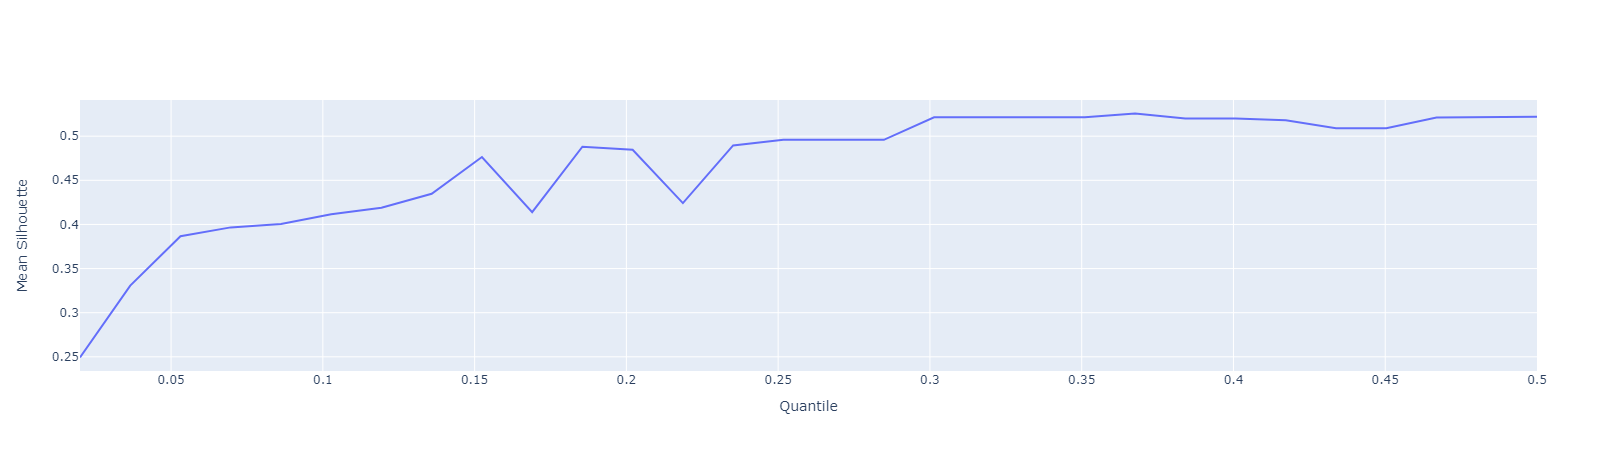

In [268]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot, y = silhouette_values))

fig.update_layout(dict(xaxis_title = 'Quantile', yaxis_title = 'Mean Silhouette'))

fig.show()

In [271]:
# Estimate Bandwidth

BW = estimate_bandwidth(df_customer_scaled, quantile = 0.3)
mean_shift_model_bw = MeanShift(BW)  
mean_shift_model_bw.fit(df_customer_scaled)

ms_predict = mean_shift_model_bw.predict(df_customer_scaled)

np.unique(mean_shift_model_bw.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

### Evaluation

In [272]:
# Means Shift Metrics

# Silhouette Score
print(f'SS: {silhouette_score(df_customer_scaled, mean_shift_model_bw.labels_)}')

# Davies-Bouldin Index
print(f'DBI: {davies_bouldin_score(df_customer_scaled, mean_shift_model_bw.labels_)}')

# Calinski Harabasz Index
print(f'CHI: {calinski_harabasz_score(df_customer_scaled, mean_shift_model_bw.labels_)}')

SS: 0.5213598732351489
DBI: 0.3111050732680233
CHI: 268.159949256041


For n_clusters = 38.

The average silhouette_score is : 0.5213598732351489.


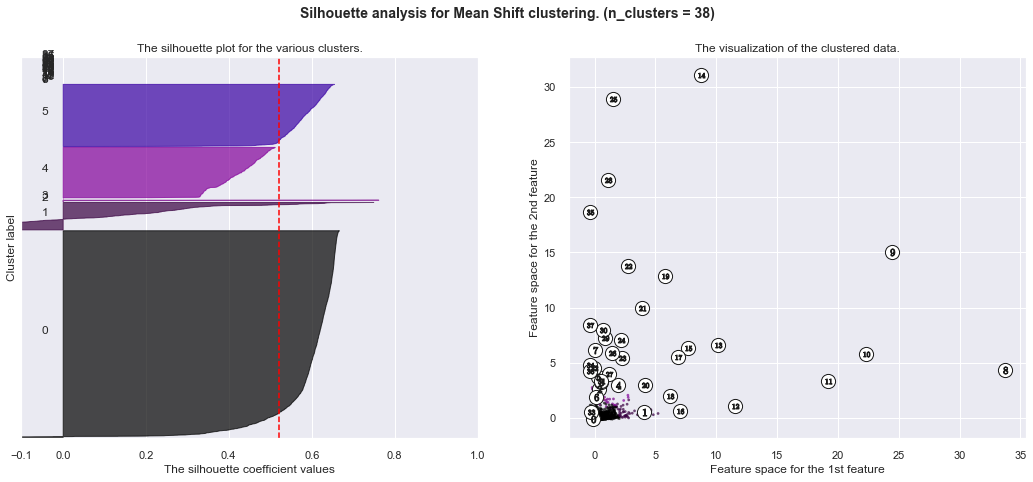

In [273]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_customer_scaled) + (len(np.unique(mean_shift_model_bw.labels_)) + 1) * 10])

silhouette_avg = silhouette_score(df_customer_scaled, mean_shift_model_bw.fit_predict(df_customer_scaled))
print(f"For n_clusters = {len(np.unique(mean_shift_model_bw.labels_))}.\n\nThe average silhouette_score is : {silhouette_avg}.")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_customer_scaled, mean_shift_model_bw.fit_predict(df_customer_scaled))

y_lower = 10
for i in range(len(np.unique(mean_shift_model_bw.labels_))):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(np.unique(mean_shift_model_bw.labels_)))
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(mean_shift_model_bw.fit_predict(df_customer_scaled).astype(float) / len(np.unique(mean_shift_model_bw.labels_)))
ax2.scatter(df_customer_scaled.values[:, 0], df_customer_scaled.values[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = mean_shift_model_bw.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle((f"Silhouette analysis for Mean Shift clustering. (n_clusters = {len(np.unique(mean_shift_model_bw.labels_))})"),fontsize=14, fontweight='bold')

plt.show()

### Mean Shift Clusters Report

In [274]:
df_mean_shift = df_customer.copy()
df_mean_shift['clusters'] = mean_shift_model.fit_predict(df_customer_scaled)

In [275]:
# Number of Customers
df_insiders_report_mean_shift = df_mean_shift[['CustomerID','clusters']].groupby('clusters').count().reset_index()
df_insiders_report_mean_shift['perc_customer'] = 100 * (df_insiders_report_mean_shift['CustomerID'] / df_insiders_report_mean_shift['CustomerID'].sum())

# AVG Total_Spend
df_insiders_report_mean_shift['AVG_total_spend'] = df_mean_shift[['total_spend', 'clusters']].groupby('clusters').mean().reset_index()['total_spend']

# AVG total_invoices
df_insiders_report_mean_shift['AVG_total_invoices'] = df_mean_shift[['total_invoices', 'clusters']].groupby('clusters').mean().reset_index()['total_invoices']

# AVG last_purchase
df_insiders_report_mean_shift['AVG_last_purchase'] = df_mean_shift[['last_purchase_(days)', 'clusters']].groupby('clusters').mean().reset_index()['last_purchase_(days)']

# AVG total_itens_purchased
df_insiders_report_mean_shift['AVG_total_itens_purchased'] = df_mean_shift[['total_itens_purchased', 'clusters']].groupby('clusters').mean().reset_index()['total_itens_purchased']

In [276]:
df_insiders_report_mean_shift

clusters  CustomerID  perc_customer  AVG_total_spend  AVG_total_invoices  AVG_last_purchase  AVG_total_itens_purchased
0          0        4212          97.19          1236.92               70.98              95.46                     736.31
1          1          50           1.15          6496.13              730.50               9.92                    3840.14
2          2          25           0.58         16749.29              273.52              11.64                    9198.52
3          3           3           0.07         31031.01              203.00              10.33                   32877.33
4          4           5           0.12         22431.43              618.40               2.60                   12572.80
5          5           2           0.05         35386.84              153.00               8.00                   16952.00
6          6           2           0.05         18965.07              112.50               9.00                   24362.00
7          7           2           0.05         57141.60               99.50               5.00                   30061.00
8          8           1           0.02         40495.99             7667.00               2.00                   22816.00
9          9           1           0.02        136161.83             5584.00               2.00                   80154.00
10        10           1           0.02         53258.43             5095.00               5.00                   16336.00
11        11           1           0.02         31650.78             4397.00               1.00                   25051.00
12        12           1           0.02         11926.15             2674.00               2.00                    6177.00
13        13           1           0.02         60632.75             2366.00               1.00                   38147.00
14        14           1           0.02        279138.02             2060.00               2.00                  196844.00
15        15           1           0.02         58762.08             1814.00               3.00                   31025.00
16        16           1           0.02          7411.71             1662.00               2.00                    4761.00
17        17           1           0.02         51527.30             1637.00               9.00                   58343.00
18        18           1           0.02         19766.59             1477.00              10.00                    9131.00
19        19           1           0.02        116560.08             1382.00              10.00                   57755.00
20        20           1           0.02         28337.38             1024.00              12.00                   19068.00
21        21           1           0.02         91062.38              963.00               3.00                   64549.00
22        22           1           0.02        124564.53              713.00              25.00                   77373.00
23        23           1           0.02         50491.81              589.00              11.00                   12665.00
24        24           1           0.02         65039.62              568.00               4.00                   63312.00
25        25           1           0.02        259657.30              431.00               1.00                   64124.00
26        26           1           0.02         54534.14              403.00               4.00                   28920.00
27        27           1           0.02         37153.85              349.00               2.00                   23948.00
28        28           1           0.02        194390.79              336.00               9.00                   69973.00
29        29           1           0.02         66653.56              277.00               5.00                   50255.00
30        30           1           0.02         72708.09              240.00              39.00                   40107.00
31        31           2           0.05         24560.27            

### TSNE Visualization - Mean Shift

<AxesSubplot:>

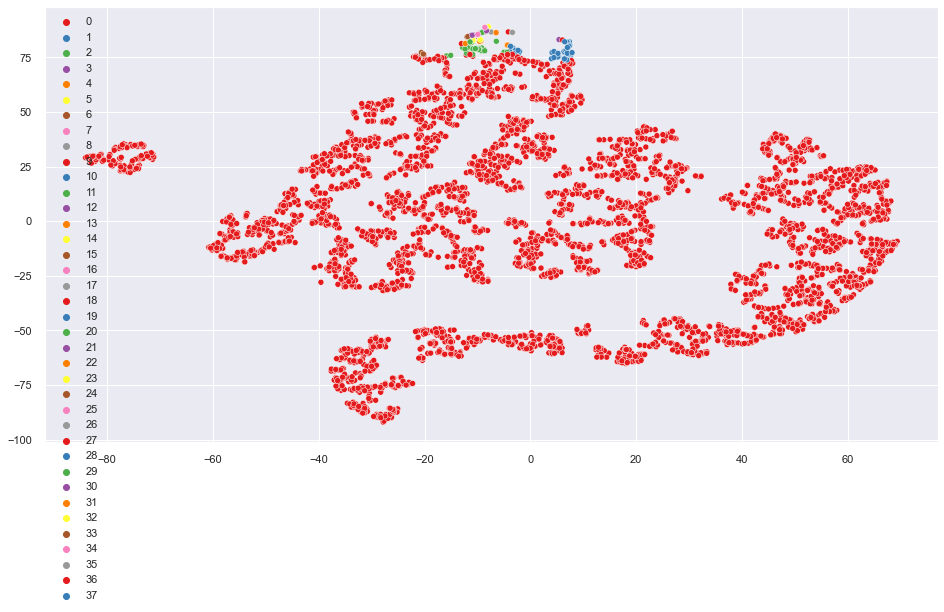

In [279]:
# TSNE - high-dimensional visualize data.

tsne = TSNE(perplexity=25)

visualization = tsne.fit_transform(X = df_customer_scaled)

sns.scatterplot(x = visualization[:,0], y = visualization[:,1], hue = mean_shift_model.labels_, palette = sns.color_palette('Set1', 38))

# Best Model

In [280]:
evaluation_dict = [
    {
        'Model':'KMeans', 'Number of cluesters': len(df_insiders_report_KMeans["clusters"]), 'Mean Silhouette Score':  silhouette_score(df_customer_scaled, df_customer_Kmeans.labels_),
        'Davies-Boudin Index': davies_bouldin_score(df_customer_scaled, df_customer_Kmeans.labels_), 'Calinski Harabasz Index': calinski_harabasz_score(df_customer_scaled, df_customer_Kmeans.labels_)
    },
    {
        'Model': 'DBSCAN', 'Number of cluesters': len(df_insiders_report_dbscan["clusters"]), 'Mean Silhouette Score':   silhouette_score(df_customer_scaled, dbscan_model.labels_),
        'Davies-Boudin Index': davies_bouldin_score(df_customer_scaled, dbscan_model.labels_), 'Calinski Harabasz Index': calinski_harabasz_score(df_customer_scaled, dbscan_model.labels_)
    },
    {
        'Model': 'Mean Shift', 'Number of cluesters': len(df_insiders_report_mean_shift["clusters"]), 'Mean Silhouette Score': silhouette_score(df_customer_scaled, mean_shift_model_bw.labels_),
        'Davies-Boudin Index': davies_bouldin_score(df_customer_scaled, mean_shift_model_bw.labels_), 'Calinski Harabasz Index': calinski_harabasz_score(df_customer_scaled, mean_shift_model_bw.labels_)
    }
]

df_model_evaluation = pd.DataFrame(evaluation_dict)

In [283]:
df_model_evaluation.style.highlight_max(color = 'darkorange')

In [282]:
# kmeans, DBSCAN, Mean Shift clusters descriptionf

display(df_insiders_report_KMeans, '-'*105)
display(df_insiders_report_dbscan, '-'*105)
display(df_insiders_report_mean_shift, '-'*105)

clusters  CustomerID  perc_customer  AVG_total_spend  AVG_total_invoices  AVG_last_purchase  AVG_total_itens_purchased
0         0        3230          74.53          1913.83              100.87              41.76                    1150.62
1         1          18           0.42        108217.76             1974.11              24.89                   61743.11
2         2        1086          25.06           559.53               27.46             247.43                     289.05

'---------------------------------------------------------------------------------------------------------'

clusters  CustomerID  perc_customer  AVG_total_spend  AVG_total_invoices  AVG_last_purchase  AVG_total_itens_purchased
0        -1          40           0.92         66600.99             1155.55              28.12                   38826.53
1         0        4294          99.08          1414.34               80.33              93.83                     835.75

'---------------------------------------------------------------------------------------------------------'

clusters  CustomerID  perc_customer  AVG_total_spend  AVG_total_invoices  AVG_last_purchase  AVG_total_itens_purchased
0          0        4212          97.19          1236.92               70.98              95.46                     736.31
1          1          50           1.15          6496.13              730.50               9.92                    3840.14
2          2          25           0.58         16749.29              273.52              11.64                    9198.52
3          3           3           0.07         31031.01              203.00              10.33                   32877.33
4          4           5           0.12         22431.43              618.40               2.60                   12572.80
5          5           2           0.05         35386.84              153.00               8.00                   16952.00
6          6           2           0.05         18965.07              112.50               9.00                   24362.00
7          7           2           0.05         57141.60               99.50               5.00                   30061.00
8          8           1           0.02         40495.99             7667.00               2.00                   22816.00
9          9           1           0.02        136161.83             5584.00               2.00                   80154.00
10        10           1           0.02         53258.43             5095.00               5.00                   16336.00
11        11           1           0.02         31650.78             4397.00               1.00                   25051.00
12        12           1           0.02         11926.15             2674.00               2.00                    6177.00
13        13           1           0.02         60632.75             2366.00               1.00                   38147.00
14        14           1           0.02        279138.02             2060.00               2.00                  196844.00
15        15           1           0.02         58762.08             1814.00               3.00                   31025.00
16        16           1           0.02          7411.71             1662.00               2.00                    4761.00
17        17           1           0.02         51527.30             1637.00               9.00                   58343.00
18        18           1           0.02         19766.59             1477.00              10.00                    9131.00
19        19           1           0.02        116560.08             1382.00              10.00                   57755.00
20        20           1           0.02         28337.38             1024.00              12.00                   19068.00
21        21           1           0.02         91062.38              963.00               3.00                   64549.00
22        22           1           0.02        124564.53              713.00              25.00                   77373.00
23        23           1           0.02         50491.81              589.00              11.00                   12665.00
24        24           1           0.02         65039.62              568.00               4.00                   63312.00
25        25           1           0.02        259657.30              431.00               1.00                   64124.00
26        26           1           0.02         54534.14              403.00               4.00                   28920.00
27        27           1           0.02         37153.85              349.00               2.00                   23948.00
28        28           1           0.02        194390.79              336.00               9.00                   69973.00
29        29           1           0.02         66653.56              277.00               5.00                   50255.00
30        30           1           0.02         72708.09              240.00              39.00                   40107.00
31        31           2           0.05         24560.27            

'---------------------------------------------------------------------------------------------------------'

# DBSCAM Final Cluster Analysis

## Customer Segmentation Analysis

1. Who are the elegible people to participate in the “Insiders Program”?

The first group of Insiders Program is composed by 36 customers, they are the customers that wore considered with higher expend values, higher number of invoices and the higher total intens purchased, they have also the last invoice with less them 45 days.
    
    * Avegare Spend: £ 69319.25
    * Average Total Invoices: 1282.83
    * Average Total Itens Purchased: 40094.92
    * Averag Last Purchase (days): 7.39
    
    
They are from:

    * UK - 31    
    * Ireland - 2   
    * Sweden - 1    
    * Netherlands - 1    
    * Australia - 1

The DBSCAM have selected some clients that do not buy anithing for a long time. In order to correct that, we'll separate this clients from Insiders selection and show it to the marketing team wilth some data insights about them.

In [327]:
insiders = df_customer_DB[df_customer_DB['clusters'] == - 1]
separated_customers = insiders[insiders['last_purchase_(days)'] > 45]
insiders = insiders[insiders['last_purchase_(days)'] < 45]
insiders.head()

CustomerID         Country  total_invoices  total_spend  total_itens_purchased  last_purchase_(days)  clusters
56     12415.00       Australia             713    124564.53                  77373                    25        -1
327    12748.00  United Kingdom            4397     31650.78                  25051                     1        -1
432    12901.00  United Kingdom             116     17654.54                  23075                     9        -1
454    12931.00  United Kingdom              82     42055.96                  28004                    22        -1
559    13081.00  United Kingdom            1024     28337.38                  19068                    12        -1

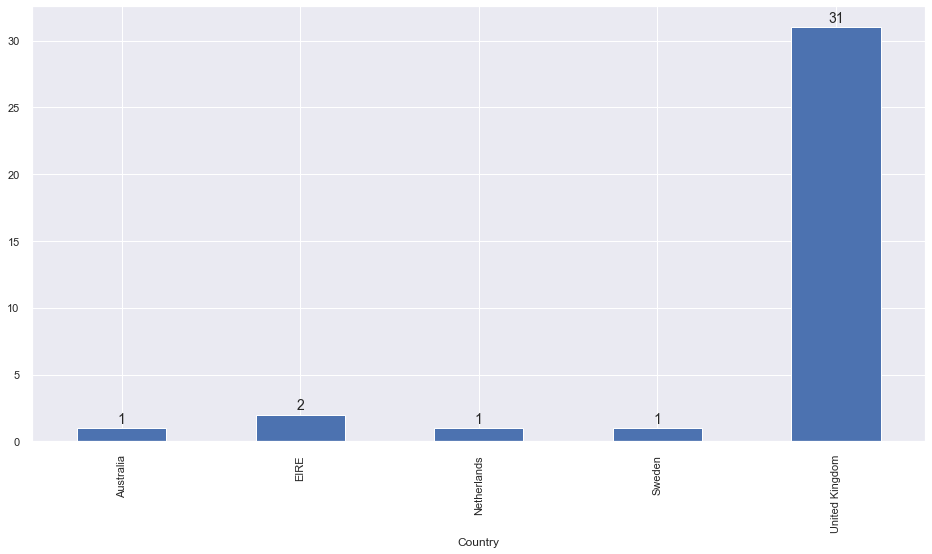

In [307]:
ax = insiders.groupby('Country')['Country'].count().plot(kind = 'bar')
annot_plot(ax)

In [323]:
insiders.describe().T['mean']

CustomerID              15105.83
total_invoices           1282.83
total_spend             69319.25
total_itens_purchased   40094.92
last_purchase_(days)        7.39
clusters                   -1.00
Name: mean, dtype: float64

2. How many clients will be part of the group?

    - The first Insiders Group contains 36 customers.

3. Which are the main caracteristics for the group?

The first group of Insiders Program is composed by 36 customers, they are the customers that wore considered with higher expend values, higher number of invoices and the higher total intens purchased, they have also the last invoice with less them 45 days.
    
    * Avegare Spend: £ 69319.25
    * Average Total Invoices: 1282.83
    * Average Total Itens Purchased: 40094.92
    * Averag Last Purchase (days): 7.39
    
    
They are from:

    * UK - 31    
    * Ireland - 2   
    * Sweden - 1    
    * Netherlands - 1    
    * Australia - 1

4. Which is the revenues percentage that comes from the group?

    - The Insiders Group represents 28.56% from the entire revenues from the data set.

In [331]:
round((insiders['total_spend'].sum() / df_customer['total_spend'].sum()) * 100, 2)

28.56

5. Which are the expected revenues from this group for the next months?

6. Which are the conditions to a client be eligible for the “Insiders”?

7. Which are the conditions to a client be removed from the “Insiders”?

8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?

9. Which actions the marketing team can perform in order to improve the income?

# Deploy to Production